In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [2]:
atlas_name = 'atlasV4'

# Generate transformed annotation volume meshes

Untransformed annotation volume meshes are generated in `visualize_annotationVolume_v2`

In [29]:
warp_setting = 9

In [40]:
stack_fixed = 'MD589'
stack_moving = 'MD594'
# stack_moving = 'MD585'

In [41]:
vol_f_xmin, vol_f_xmax, vol_f_ymin, vol_f_ymax, vol_f_zmin, vol_f_zmax = \
DataManager.load_original_volume_bbox(stack_fixed, volume_type='annotation', downscale=32)

print vol_f_xmin, vol_f_xmax, vol_f_ymin, vol_f_ymax, vol_f_zmin, vol_f_zmax

# This is the bbox of annotation volume in aligned uncropped specimen space.

622 1042 155 502 128 503


In [42]:
for name_s in all_known_structures_sided:
    print name_s
    
    try:
        vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                            stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                            warp_setting=warp_setting,
                                            structure=name_s)
    except:
        sys.stderr.write('Cannot load volume %s\n' % name_s)
        
    xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(vol)
    vol_inbbox = vol[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1].astype(np.float)

    t = time.time()
    # These origins are with respect to aligned uncropped specimen space.
    polydata = volume_to_polydata(vol_inbbox, origin=(vol_f_xmin+xmin, vol_f_ymin+ymin, vol_f_zmin+zmin), 
                                  num_simplify_iter=3, smooth=True)
    sys.stderr.write('time: %.2f seconds.\n' % (time.time() - t) )
    
    fp = DataManager.get_mesh_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                       vol_type_f='annotationAsScore',
                                       vol_type_m='annotationAsScore',
                                       structure=name_s, warp_setting=9)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(polydata, fp)
    upload_to_s3(fp)

5N_L


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7953: 0.06 seconds
simplify 1 @ 1592: 0.06 seconds
simplify 2 @ 320: 0.02 seconds
time: 0.16 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_L.stl"
5N_R


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7174: 0.06 seconds
simplify 1 @ 1436: 0.05 seconds
simplify 2 @ 288: 0.01 seconds
time: 0.14 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_5N_R.stl"
6N_L


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1061: 0.01 seconds
simplify 1 @ 213: 0.01 seconds
simplify 2 @ 44: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_L.stl"
6N_R


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 991: 0.01 seconds
simplify 1 @ 199: 0.01 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_6N_R.stl"
7N_L


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14348: 0.12 seconds
simplify 1 @ 2872: 0.12 seconds
simplify 2 @ 575: 0.03 seconds
time: 0.31 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_L.stl"
7N_R


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12774: 0.11 seconds
simplify 1 @ 2556: 0.10 seconds
simplify 2 @ 512: 0.02 seconds
time: 0.28 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7N_R.stl"
7n_L


marching cube: 0.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10220: 0.09 seconds
simplify 1 @ 2045: 0.08 seconds
simplify 2 @ 410: 0.02 seconds
time: 0.28 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_L.stl"
7n_R


marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10015: 0.08 seconds
simplify 1 @ 2004: 0.08 seconds
simplify 2 @ 402: 0.02 seconds
time: 0.26 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_7n_R.stl"
Amb_L


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 847: 0.01 seconds
simplify 1 @ 171: 0.01 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_L.stl"
Amb_R


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 943: 0.01 seconds
simplify 1 @ 190: 0.01 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Amb_R.stl"
LC_L


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4348: 0.04 seconds
simplify 1 @ 871: 0.03 seconds
simplify 2 @ 175: 0.01 seconds
time: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_L.stl"
LC_R


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3930: 0.04 seconds
simplify 1 @ 787: 0.03 seconds
simplify 2 @ 159: 0.01 seconds
time: 0.09 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LC_R.stl"
LRt_L


marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11278: 0.13 seconds
simplify 1 @ 2254: 0.09 seconds
simplify 2 @ 452: 0.02 seconds
time: 0.30 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_L.stl"
LRt_R


marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15515: 0.14 seconds
simplify 1 @ 3092: 0.13 seconds
simplify 2 @ 616: 0.03 seconds
time: 0.39 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_LRt_R.stl"
Pn_L


marching cube: 0.05 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19189: 0.18 seconds
simplify 1 @ 3839: 0.17 seconds
simplify 2 @ 769: 0.04 seconds
time: 0.47 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_L.stl"
Pn_R


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15866: 0.14 seconds
simplify 1 @ 3176: 0.13 seconds
simplify 2 @ 636: 0.03 seconds
time: 0.35 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Pn_R.stl"
Tz_L


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4804: 0.04 seconds
simplify 1 @ 962: 0.03 seconds
simplify 2 @ 194: 0.01 seconds
time: 0.10 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_L.stl"
Tz_R


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5707: 0.05 seconds
simplify 1 @ 1143: 0.04 seconds
simplify 2 @ 230: 0.01 seconds
time: 0.12 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Tz_R.stl"
VLL_L


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11903: 0.12 seconds
simplify 1 @ 2382: 0.09 seconds
simplify 2 @ 478: 0.02 seconds
time: 0.30 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_L.stl"
VLL_R


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11699: 0.14 seconds
simplify 1 @ 2329: 0.09 seconds
simplify 2 @ 465: 0.02 seconds
time: 0.31 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VLL_R.stl"
RMC_L


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6345: 0.06 seconds
simplify 1 @ 1270: 0.05 seconds
simplify 2 @ 255: 0.01 seconds
time: 0.15 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_L.stl"
RMC_R


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6145: 0.05 seconds
simplify 1 @ 1230: 0.05 seconds
simplify 2 @ 247: 0.01 seconds
time: 0.14 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RMC_R.stl"
SNC_L


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8119: 0.07 seconds
simplify 1 @ 1625: 0.06 seconds
simplify 2 @ 326: 0.01 seconds
time: 0.19 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_L.stl"
SNC_R


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6724: 0.05 seconds
simplify 1 @ 1346: 0.05 seconds
simplify 2 @ 270: 0.01 seconds
time: 0.14 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNC_R.stl"
SNR_L


marching cube: 0.13 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32561: 0.25 seconds
simplify 1 @ 6515: 0.30 seconds
simplify 2 @ 1304: 0.06 seconds
time: 0.78 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_L.stl"
SNR_R


marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28919: 0.26 seconds
simplify 1 @ 5785: 0.27 seconds
simplify 2 @ 1158: 0.05 seconds
time: 0.75 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SNR_R.stl"
3N_L


marching cube: 0.00 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2333: 0.02 seconds
simplify 1 @ 468: 0.02 seconds
simplify 2 @ 95: 0.00 seconds
time: 0.05 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_L.stl"
3N_R


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2607: 0.03 seconds
simplify 1 @ 523: 0.02 seconds
simplify 2 @ 106: 0.00 seconds
time: 0.06 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_3N_R.stl"
4N_L


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 645: 0.01 seconds
simplify 1 @ 130: 0.00 seconds
time: 0.02 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_L.stl"
4N_R


marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 472: 0.01 seconds
simplify 1 @ 96: 0.00 seconds
time: 0.01 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_4N_R.stl"
Sp5I_L


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5994: 0.08 seconds
simplify 1 @ 1200: 0.04 seconds
simplify 2 @ 241: 0.01 seconds
time: 0.17 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_L.stl"
Sp5I_R


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11604: 0.12 seconds
simplify 1 @ 2322: 0.09 seconds
simplify 2 @ 466: 0.02 seconds
time: 0.28 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5I_R.stl"
Sp5O_L


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7348: 0.13 seconds
simplify 1 @ 1468: 0.05 seconds
simplify 2 @ 293: 0.01 seconds
time: 0.24 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_L.stl"
Sp5O_R


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10728: 0.18 seconds
simplify 1 @ 2147: 0.09 seconds
simplify 2 @ 430: 0.02 seconds
time: 0.35 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5O_R.stl"
Sp5C_L


marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35019: 0.33 seconds
simplify 1 @ 7005: 0.35 seconds
simplify 2 @ 1402: 0.07 seconds
time: 0.93 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_L.stl"
Sp5C_R


marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27510: 0.25 seconds
simplify 1 @ 5504: 0.25 seconds
simplify 2 @ 1102: 0.05 seconds
time: 0.69 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.stl"
PBG_L


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2992: 0.02 seconds
simplify 1 @ 600: 0.02 seconds
simplify 2 @ 121: 0.00 seconds
time: 0.07 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_L.stl"
PBG_R


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2440: 0.03 seconds
simplify 1 @ 489: 0.02 seconds
simplify 2 @ 99: 0.00 seconds
time: 0.06 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_PBG_R.stl"
10N_L


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3826: 0.03 seconds
simplify 1 @ 767: 0.03 seconds
simplify 2 @ 154: 0.01 seconds
time: 0.09 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_L.stl"
10N_R


marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3376: 0.03 seconds
simplify 1 @ 676: 0.02 seconds
simplify 2 @ 136: 0.01 seconds
time: 0.07 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_10N_R.stl"
VCA_L


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13533: 0.12 seconds
simplify 1 @ 2708: 0.11 seconds
simplify 2 @ 543: 0.02 seconds
time: 0.31 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_L.stl"
VCA_R


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14111: 0.12 seconds
simplify 1 @ 2823: 0.11 seconds
simplify 2 @ 566: 0.03 seconds
time: 0.32 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCA_R.stl"
VCP_L


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6285: 0.08 seconds
simplify 1 @ 1258: 0.05 seconds
simplify 2 @ 253: 0.01 seconds
time: 0.16 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_L.stl"
VCP_R


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8930: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_VCP_R.stl"
DC_L


simplify 1 @ 1741: 0.07 seconds
simplify 2 @ 342: 0.02 seconds
time: 0.25 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14037: 0.13 seconds
simplify 1 @ 2809: 0.12 seconds
simplify 2 @ 563: 0.02 seconds
time: 0.34 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_L.stl"
DC_R


marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 13193: 0.32 seconds
simplify 1 @ 2569: 0.21 seconds
simplify 2 @ 486: 0.04 seconds
time: 0.70 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_DC_R.stl"
AP


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3258: 0.05 seconds
simplify 1 @ 653: 0.04 seconds
simplify 2 @ 132: 0.01 seconds
time: 0.12 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_AP.stl"
12N


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14177: 0.13 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_12N.stl"
RtTg


simplify 1 @ 2837: 0.14 seconds
simplify 2 @ 568: 0.03 seconds
time: 0.37 seconds.
marching cube: 0.09 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29675: 0.25 seconds
simplify 1 @ 5940: 0.28 seconds
simplify 2 @ 1188: 0.06 seconds
time: 0.73 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_RtTg.stl"
sp5
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down3

File does not exist: /home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.bp
Cannot load volume sp5
marching cube: 0.09 seconds
mesh_to_polydata: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_sp5.stl"
outerContour
rm -rf "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_w

simplify 0 @ 29675: 0.25 seconds
simplify 1 @ 5940: 0.25 seconds
simplify 2 @ 1188: 0.06 seconds
time: 0.70 seconds.
File does not exist: /home/yuncong/CSHL_volumes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.bp
Cannot load volume outerContour
marching cube: 0.11 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 29675: 0.28 seconds
simplify 1 @ 5940: 0.32 seconds
simplify 2 @ 1188: 0.07 seconds
time: 0.83 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_outerContour.stl"
SC


marching cube: 0.62 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 118327: 1.55 seconds
simplify 1 @ 23670: 1.43 seconds
simplify 2 @ 4733: 0.28 seconds
time: 4.06 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_SC.stl"
IC


marching cube: 0.38 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 78090: 0.83 seconds
simplify 1 @ 15624: 0.84 seconds
simplify 2 @ 3126: 0.17 seconds
time: 2.34 seconds.


aws s3 cp "/home/yuncong/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.stl" "s3://mousebrainatlas-data/CSHL_meshes/MD594/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/MD594_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_IC.stl"


# Load meshes of annotated specimens (more than two stacks)

In [57]:
warp_setting = 9

In [58]:
stack_fixed = 'MD589'
stacks_moving = ['MD585', 'MD594']
# stacks_moving = ['MD594']

In [59]:
# These origins are with respect to aligned uncropped specimen space.

moving_volume_alignedTo_fixed_volume_polydata_list_all_stacks = \
{stack_moving: \
DataManager.load_meshes(stack_m=stack_moving, stack_f=stack_fixed, warp_setting=warp_setting, 
                       vol_type_m='annotationAsScore', vol_type_f='annotationAsScore', sided=True)
    for stack_moving in stacks_moving}

In [60]:
stack_to_color = {'MD585': (1,0,0), 'MD589': (0,1,0), 'MD594': (0,0,1)}

In [68]:
mesh_actors = []
for st, meshes in moving_volume_alignedTo_fixed_volume_polydata_list_all_stacks.iteritems():
    mesh_actors += [actor_mesh(polydata=m, color=stack_to_color[st], wireframe=True, opacity=.3) 
                    for name_s, m in meshes.iteritems()]

In [69]:
meshes_f = DataManager.load_meshes(stack_m=stack_fixed, vol_type_m='annotation', sided=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationVolume/MD589_down32_annotationVolume_sp5.stl
Error loading mesh for sp5: Mesh is empty: sp5..
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationVolume/MD589_down32_annotationVolume_outerContour.stl
Error loading mesh for outerContour: Mesh is empty: outerContour..


In [70]:
mesh_actors += [actor_mesh(polydata=m, color=stack_to_color[stack_fixed], wireframe=True, opacity=.3) for name_s, m in meshes_f.iteritems()]

In [71]:
launch_vtk(mesh_actors)

# Generate atlas (average shapes at average positions)

In [24]:
centroid_allLandmarks = defaultdict(list)
polydata_list_allLandmarks = {}

In [25]:
for name_u in all_known_structures:
# for name_u in ['SC']:

    print name_u
    
    #############################################################
    ## Collect meshes of the same structure (both hemispheres) ##
    #############################################################
    
    try:
        # Points in vertices_list and faces_list are wrt to aligned uncropped fixed specimen space.
    
        vertices_list = []
        faces_list = []

        if name_u in singular_structures: # If structure is singular

            # Load the instance in fixed stack.
            vertices, faces = DataManager.load_mesh(stack_m=stack_fixed, 
                                                    structure=name_u, 
                                                    type_m='annotation_as_score',
                                                    return_polydata_only=False,
                                                    trial_idx=None)


            vertices_mirrored = vertices.copy()
            zmean = vertices[:,2].mean(axis=0)
            vertices_mirrored[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin        

            vertices_list.append(vertices)
            faces_list.append(faces)

            vertices_list.append(vertices_mirrored)
            faces_list.append(faces)

            centroid = vertices.mean(axis=0)
            centroid_allLandmarks[name_u].append(centroid)

            # Load instances in moving stacks.
            for stack_moving in stacks_moving:

                vertices, faces = DataManager.load_mesh(stack_m=stack_moving, 
                                                        type_m='annotation_as_score',
                                                        stack_f=stack_fixed,
                                                        type_f='annotation_as_score',
                                                        structure=name_u, 
                                                        return_polydata_only=False,
                                                        warp_setting=warp_setting)

                vertices_mirrored = vertices.copy()
                zmean = vertices[:,2].mean(axis=0)
                vertices_mirrored[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin        

                vertices_list.append(vertices)
                faces_list.append(faces)

                vertices_list.append(vertices_mirrored)
                faces_list.append(faces)

                centroid = vertices.mean(axis=0)
                centroid_allLandmarks[name_u].append(centroid)

        else: # If structure is paired

            lname = convert_to_left_name(name_u)
            rname = convert_to_right_name(name_u)

            # Load instances from fixed stack.
            try:
                vertices, faces = DataManager.load_mesh(stack_m=stack_fixed,
                                                        type_m='annotation_as_score',
                                                        structure=lname, 
                                                        return_polydata_only=False,
                                                       trial_idx=None)

                zmean = vertices[:,2].mean(axis=0)
                vertices[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin

                vertices_list.append(vertices)
                faces_list.append(faces)

                centroid = vertices.mean(axis=0)
                centroid_allLandmarks[lname].append(centroid)
            except Exception as e:
                sys.stderr.write("Mesh of %s does not exist: %s.\n" % (lname, str(e)))                

            try:
                # !!! Right shape is used as the template !!!
                vertices, faces = DataManager.load_mesh(stack_m=stack_fixed,
                                                        type_m='annotation_as_score',
                                                        structure=rname, 
                                                        return_polydata_only=False,
                                                       trial_idx=None)

                vertices_list.append(vertices)
                faces_list.append(faces)

                centroid = vertices.mean(axis=0)
                centroid_allLandmarks[rname].append(centroid)
                
            except Exception as e:
                sys.stderr.write("Mesh of %s does not exist: %s.\n" % (rname, str(e)))

            # Load instances from moving stacks.
            for stack_moving in stacks_moving:

                try:
                    vertices, faces = DataManager.load_mesh(stack_m=stack_moving,
                                                            type_m='annotation_as_score',
                                                            stack_f=stack_fixed, 
                                                            type_f='annotation_as_score',
                                                            structure=lname, 
                                                            return_polydata_only=False,
                                                           warp_setting=warp_setting)

                    zmean = vertices[:,2].mean(axis=0)
                    vertices[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin

                    vertices_list.append(vertices)
                    faces_list.append(faces)


                    centroid = vertices.mean(axis=0)
                    centroid_allLandmarks[lname].append(centroid)
            
                except Exception as e:
                    sys.stderr.write("Mesh of %s does not exist: %s.\n" % (lname, str(e)))

                try:

                    vertices, faces = DataManager.load_mesh(stack_m=stack_moving, type_m='annotation_as_score',
                                                            stack_f=stack_fixed, type_f='annotation_as_score',
                                                            structure=rname, 
                                                            return_polydata_only=False,
                                                           warp_setting=warp_setting)

                    vertices_list.append(vertices)
                    faces_list.append(faces)

                    centroid = vertices.mean(axis=0)
                    centroid_allLandmarks[rname].append(centroid)

                except Exception as e:
                    sys.stderr.write("Mesh of %s does not exist: %s.\n" % (rname, str(e)))

#         #############################################
#         ## Align meshes of all collected instances ##
#         #############################################
        
#         # All meshes in vertices_aligned_list have vertex centroid at (0,0).
#         # In other words, all meshes are shifted such that vertex centroids coincide at a point defined as (0,0).
#         # Call this point the common centroid.
        
#         vertices_aligned_list = [] 

#         for i, vertices in enumerate(vertices_list):

#             #  Align all instances to the first instance
#             if i == 0:
#                 vertices1 = vertices.copy()
#                 vertices_aligned_list.append(vertices1 - vertices1.mean(axis=0))
#             else:            
#                 t = time.time()                    
#                 vertices_alignedTo1 = icp(fixed_pts=vertices1, moving_pts=vertices, num_iter=100, rotation_only=True)
#                 sys.stderr.write('icp, instance %d: %.2f seconds.\n' % (i, time.time() - t))

#                 vertices_aligned_list.append(vertices_alignedTo1 - vertices_alignedTo1.mean(axis=0))

#         ###########################
#         ## Compute average shape ##
#         ###########################
    
#         # polydata_list are wrt to the common centroid.
        
#         polydata_list = [mesh_to_polydata(vs, fs) for vs, fs in zip(vertices_aligned_list, faces_list)]
#         polydata_list_allLandmarks[name_u] = polydata_list
        
#         for i, poly in enumerate(polydata_list):
#             fp = DataManager.get_instance_mesh_filepath(stack_m=atlas_name, structure=name_u, index=i)
#             create_parent_dir_if_not_exists(fp)
#             save_mesh_stl(poly, fp)
#             upload_to_s3(fp)

    except Exception as e:
        sys.stderr.write('Error generating average shape for %s : %s\n' % (name_u, str(e)))

5N
6N
7N
7n
Amb
LC
LRt
Pn
Tz
VLL
RMC
SNC
SNR
3N
4N
Sp5I
Sp5O
Sp5C
PBG
10N
VCA
VCP
DC
AP
12N
RtTg


load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0_Sp5C_R.stl
Mesh of Sp5C_R does not exist: Mesh is empty: Sp5C_R..


sp5
outerContour
SC
IC


load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationAsScoreVolume/MD589_down32_annotationAsScoreVolume_sp5.stl
Error generating average shape for sp5 : Mesh is empty: sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationAsScoreVolume/MD589_down32_annotationAsScoreVolume_outerContour.stl
Error generating average shape for outerContour : Mesh is empty: outerContour.


In [39]:
polydata_list_allLandmarks = defaultdict(list)
for name_u in all_known_structures:
    for i in range(6):
        fp = DataManager.get_instance_mesh_filepath(stack_m=atlas_name, structure=name_u, index=i)
        poly = load_mesh_stl(fp, return_polydata_only=True)
        if poly is not None:
            polydata_list_allLandmarks[name_u].append(poly)
polydata_list_allLandmarks.default_factory = None

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_5.stl
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5_0.stl
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5_1.stl
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5_2.stl
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5_3.stl
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5_4.stl
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5_5.stl
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4

In [40]:
# prob_shape_origin and average_polydata are wrt to the common centroid.
# prob_shape is a compact volume.

average_polydata_allLandmarks = {}
prob_shape_allLandmarks = {}
prob_shape_origin_allLandmarks = {}
    
for name_u, polydata_list in polydata_list_allLandmarks.iteritems():
#     print name_u

    if name_u == 'IC' or name_u == 'SC':
        # IC and SC boundaries are particularly jagged, so do a larger value smoothing.
        sigma = 5.
    else:
        sigma = 2.
#     sigma = 0.

    # If is singular structure, force the prob volume symmetric.
    prob_shape, prob_shape_origin, average_polydata = average_shape(polydata_list, 
                                                        consensus_percentage=.5,
                                                        num_simplify_iter=3, smooth=True,
                                                       force_symmetric=(name_u in singular_structures), 
                                                        sigma=sigma)
    prob_shape_allLandmarks[name_u] = prob_shape
    prob_shape_origin_allLandmarks[name_u] = prob_shape_origin
    average_polydata_allLandmarks[name_u] = average_polydata

marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4137: 0.04 seconds
simplify 1 @ 829: 0.03 seconds
simplify 2 @ 167: 0.01 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10983: 0.08 seconds
simplify 1 @ 2198: 0.07 seconds
simplify 2 @ 441: 0.02 seconds
marching cube: 0.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8197: 0.05 seconds
simplify 1 @ 1641: 0.05 seconds
simplify 2 @ 329: 0.01 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9812: 0.07 seconds
simplify 1 @ 1964: 0.06 seconds
simplify 2 @ 394: 0.02 seconds
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5868: 0.04 seconds
simplify 1 @ 1175: 0.04 seconds
simplify 2 @ 236: 0.01 seconds
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1992: 0.02 seconds
simplify 1 @ 400: 0.01 seconds
simplify 2 @ 81: 0.00 seconds
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14613:

sigma: 0


marching cube: 0.48 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 71913: 0.70 seconds
simplify 1 @ 14384: 0.71 seconds
simplify 2 @ 2878: 0.14 seconds


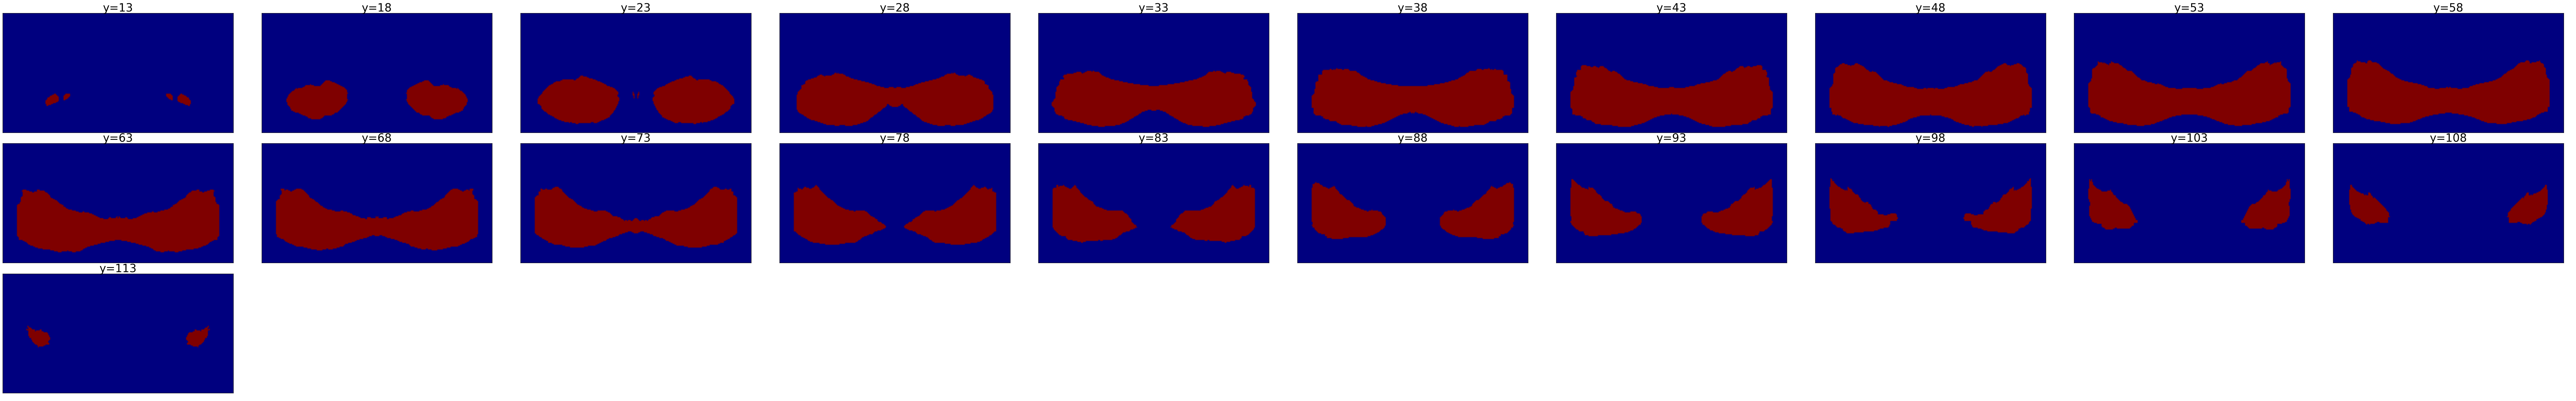

sigma: 1


marching cube: 1.06 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 65701: 1.25 seconds
simplify 1 @ 13141: 1.12 seconds
simplify 2 @ 2629: 0.18 seconds


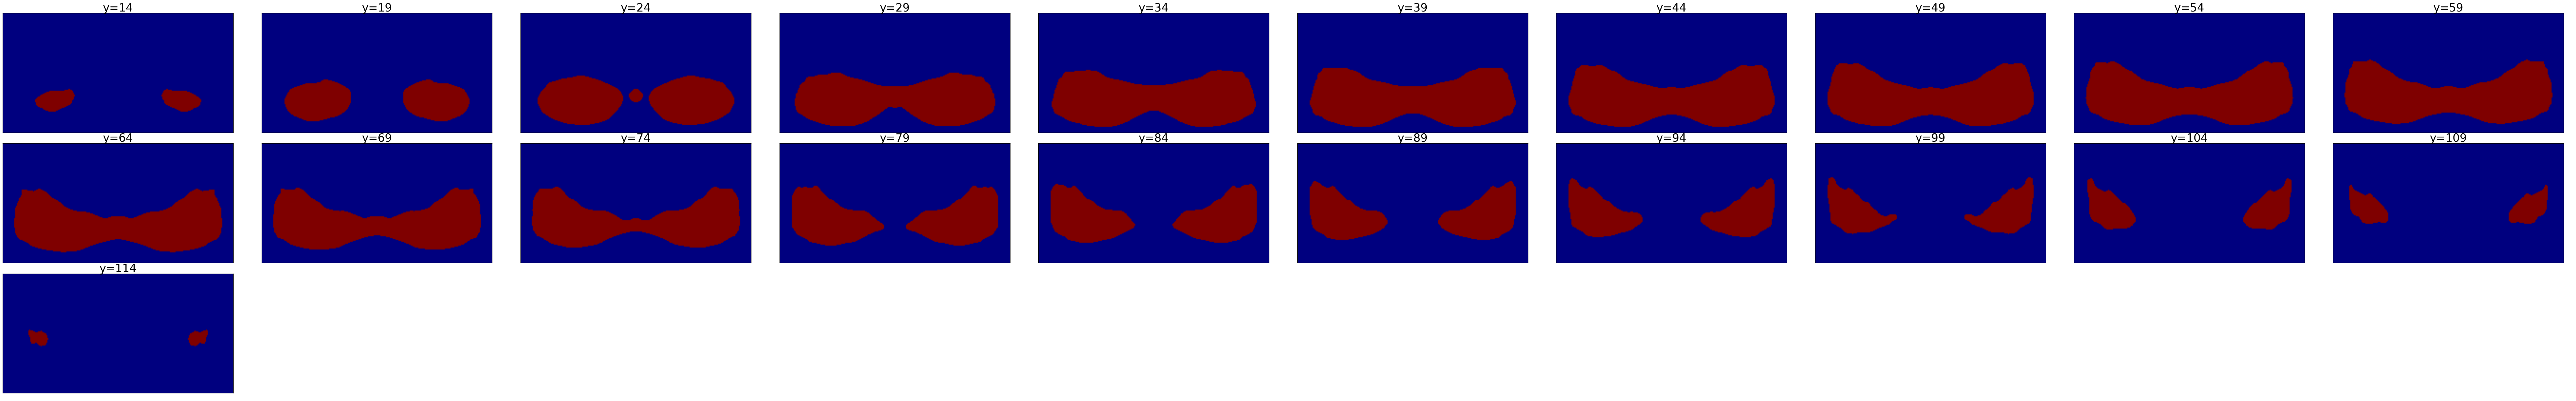

sigma: 2


marching cube: 0.51 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 64445: 0.69 seconds
simplify 1 @ 12890: 0.67 seconds
simplify 2 @ 2579: 0.12 seconds


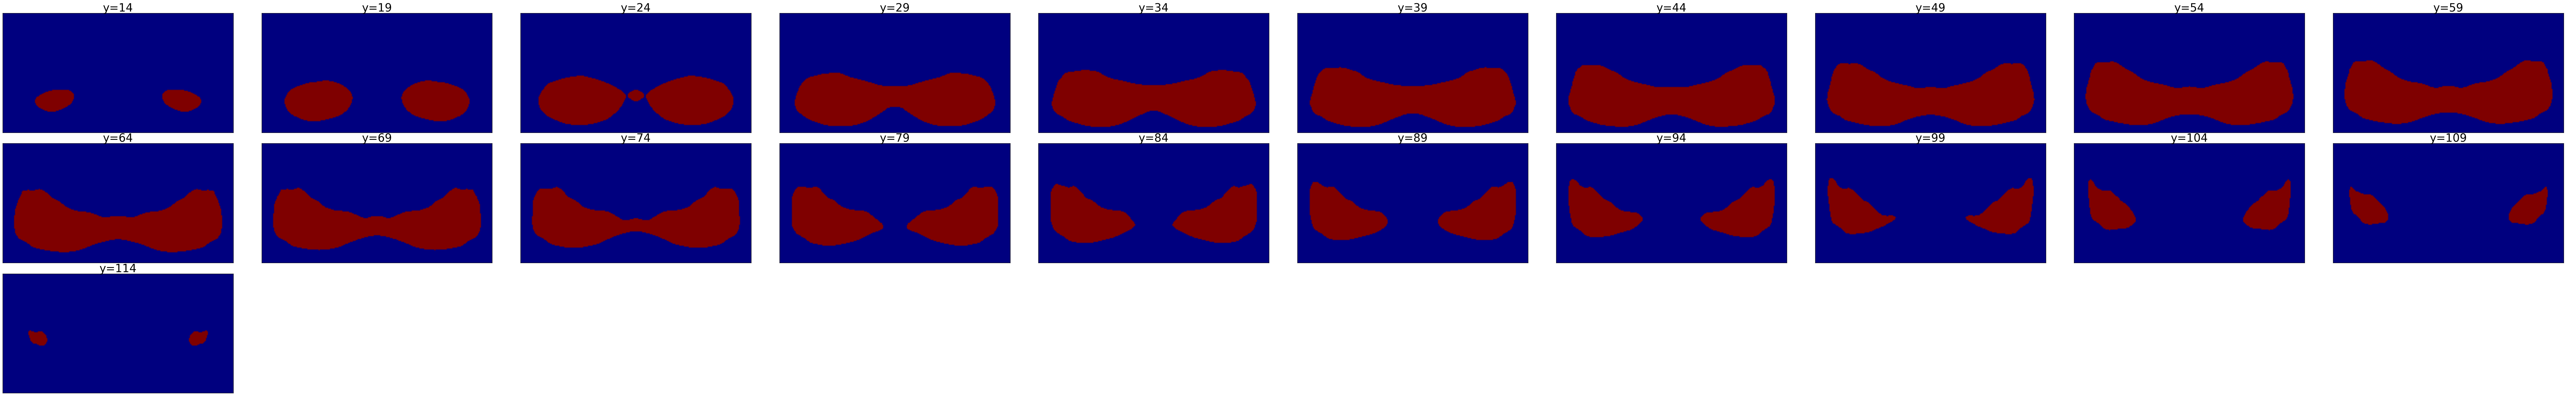

sigma: 3


marching cube: 0.87 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 63444: 1.47 seconds
simplify 1 @ 12690: 1.28 seconds
simplify 2 @ 2539: 0.30 seconds


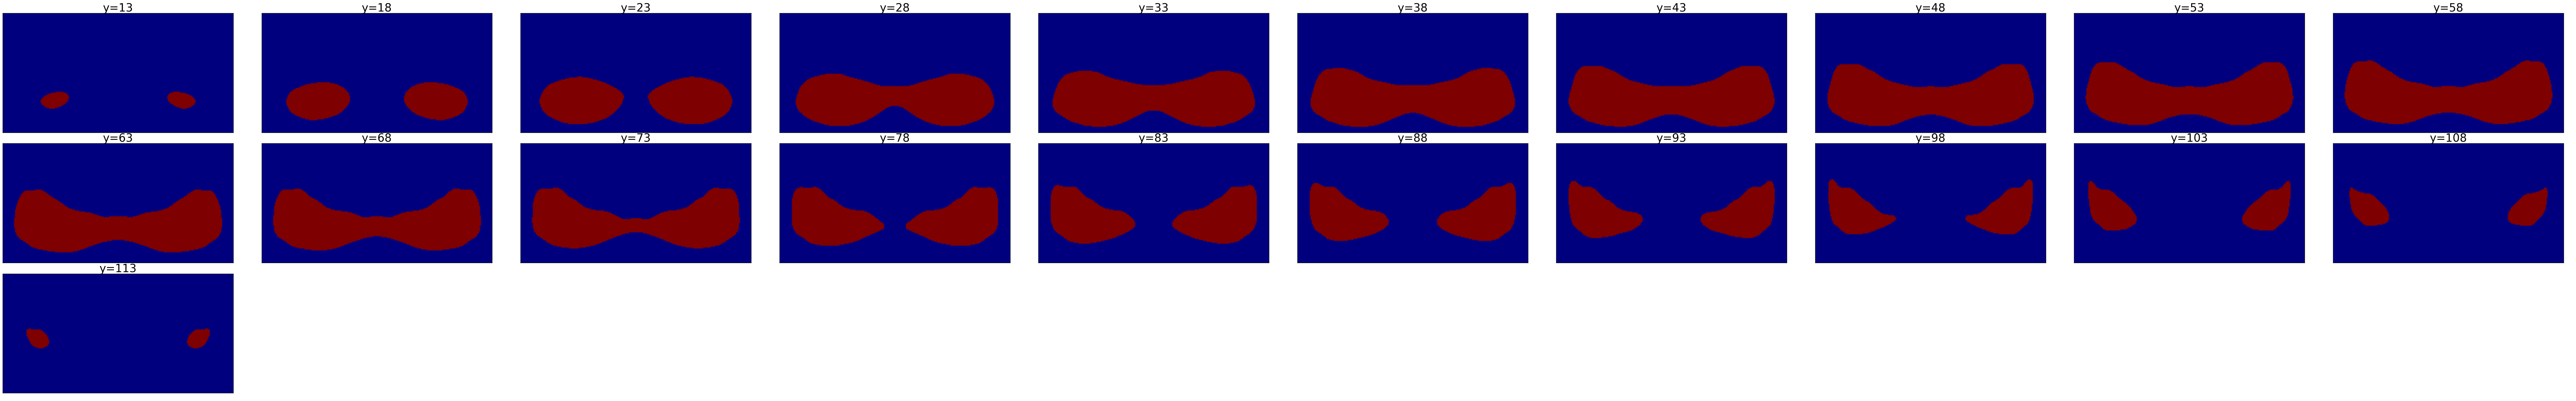

sigma: 5


marching cube: 0.57 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 62120: 0.87 seconds
simplify 1 @ 12425: 1.01 seconds
simplify 2 @ 2486: 0.22 seconds


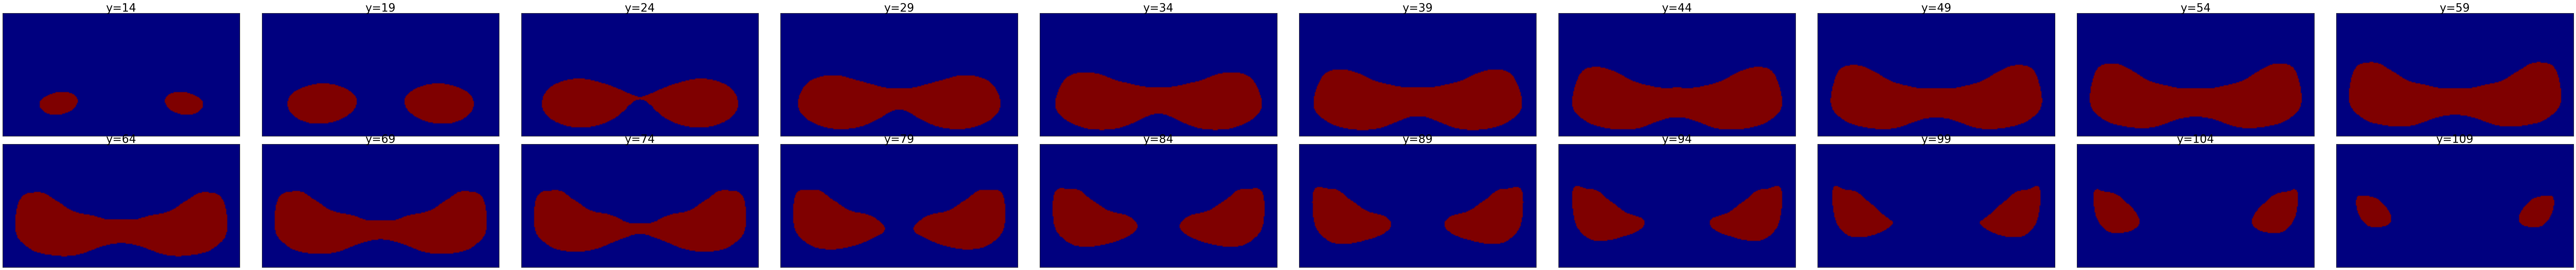

sigma: 10


marching cube: 0.56 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 57906: 0.62 seconds
simplify 1 @ 11582: 0.58 seconds
simplify 2 @ 2318: 0.11 seconds


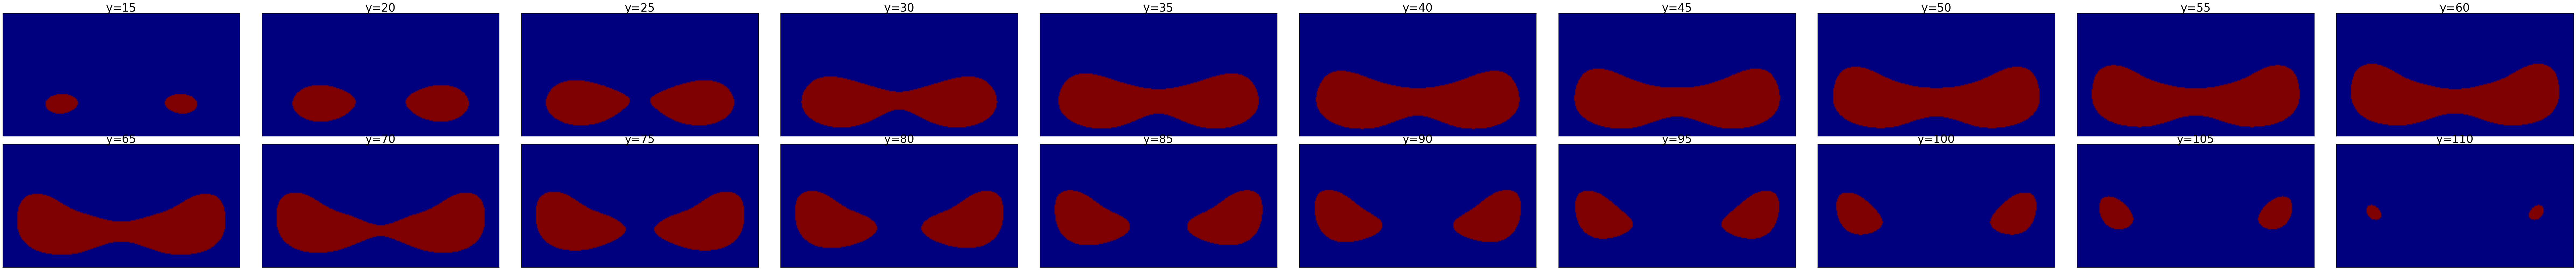

In [194]:
# Effect of the probability-smoothing sigma.

for sigma in [0,1,2,3,5,10]:
    print 'sigma:', sigma
    prob_shape, _, _ = average_shape(polydata_list_allLandmarks['IC'], 
                                                                consensus_percentage=.5,
                                                                num_simplify_iter=3, smooth=True,
                                                               force_symmetric=True, 
                                                                sigma=sigma)
#     display_volume_sections(prob_shape, every=5, ncols=10, direction='x', vmin=0., vmax=1.)
#     display_volume_sections(prob_shape, every=5, ncols=10, direction='y', vmin=0., vmax=1.)
#     display_volume_sections(prob_shape, every=5, ncols=10, direction='z', vmin=0., vmax=1.)
    display_volume_sections(prob_shape > .5, every=5, ncols=10, direction='y', vmin=0., vmax=1., cmap=plt.cm.gray)

# Visualize (1) individual instances (2) aligned instances (3) probabilistic shape (4) thresholded shape.

In [ ]:
instance_colors = [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1)] # assume each structure has at most 6 instances.

for structure in polydata_list_allLandmarks.keys():
# for structure in ['IC']:

    print structure
    
    for direction in ['coronal', 'sagittal', 'horizontal']:

        # Show each instance separately
        for i, polydata in enumerate(polydata_list_allLandmarks[structure]):
            instance_actors = actor_mesh(polydata, instance_colors[i], opacity=1, wireframe=False)

            fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_'+str(i))
            create_parent_dir_if_not_exists(fp)
            launch_vtk([instance_actors], snapshot_fn=fp, interactive=False, init_angle=direction)

        # Show different instances shown aligned together
        instance_actors = [actor_mesh(polydata, instance_colors[i], opacity=1., wireframe=True) 
                           for i, polydata in enumerate(polydata_list_allLandmarks[structure])]

        icp_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_icpAligned')
        launch_vtk(instance_actors, snapshot_fn=icp_fp, interactive=False, init_angle=direction)
#         launch_vtk(instance_actors, init_angle=direction)
        
        # Show voxel-voted probabilistic shape
        prob_shape_actor = actor_volume(prob_shape_allLandmarks[structure].astype(np.float32), 
                                        what='probability', origin=prob_shape_origin_allLandmarks[structure])

        prob_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_probShape')
        launch_vtk([prob_shape_actor], snapshot_fn=prob_shape_fp, interactive=False, init_angle=direction)
#         launch_vtk([prob_shape_actor], init_angle=direction)

        # Show voxel-voted probabilistic shape, thresholded at .5
        actor = actor_mesh(average_polydata_allLandmarks[structure], [1,1,1], opacity=1, wireframe=True)
        
        thresh_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                                structure=structure, suffix=direction+'_thresh0.5')
        launch_vtk([actor], snapshot_fn=thresh_shape_fp, interactive=False, init_angle=direction)
#         launch_vtk([actor], init_angle=direction)

# Compute average position

In [41]:
canonical_locations, canonical_centroid, canonical_normal = average_location(centroid_allLandmarks)
# canonical locations are with respect to canonical centroid
# canonical centroid is with respect to the aligned uncropped volume of MD589

[ 0.04472321 -0.08497962  0.99537849] @ [ 797.66809082  377.65426636  308.38711548]


In [42]:
print 'deviation angle:', np.rad2deg(np.arccos(canonical_normal[2]))

deviation angle: 5.51057


In [43]:
atlas_space_structure_volumes = {}
atlas_space_structure_meshes = {}

for name_s in canonical_locations.keys():
    
    name_u = convert_to_original_name(name_s)
    
    prob_shape = prob_shape_allLandmarks[name_u]
    prob_shape_origin = prob_shape_origin_allLandmarks[name_u]
    
    average_polydata = average_polydata_allLandmarks[name_u]
    # Mesh has "canonical centroid" as the origin

    vs, fs = polydata_to_mesh(average_polydata)
            
    canonical_structure_centroid = canonical_locations[name_s]
    
    if name_s in singular_structures or '_R' in name_s:
        # singular or LEFT - don't need mirroring
        atlas_space_structure_volumes[name_s] = (prob_shape, 
                                                 canonical_structure_centroid + prob_shape_origin)    
        atlas_space_structure_meshes[name_s] = mesh_to_polydata(vertices=vs + canonical_structure_centroid, 
                                                                faces=fs)
    else:
        # RIGHT - need mirroring
        atlas_space_structure_volumes[name_s] = mirror_volume(prob_shape, 
                                             canonical_structure_centroid + prob_shape_origin*(1,1,-1))
        atlas_space_structure_meshes[name_s] = mesh_to_polydata(vertices=vs*(1,1,-1) + canonical_structure_centroid, 
                                                                faces=fs)

# Save atlas structure meshes, prob volumes, and canonical parameters - individual structures in atlas space

In [ ]:
# Save atlas structure meshes - averaged for each sided structure, in atlas space

for name_s, mesh in atlas_space_structure_meshes.iteritems():
    fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=name_s)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(mesh, fp)
    upload_to_s3(fp)
    
# Save atlas structure prob. volumes compactly and each volume's origin - one for each sided structure

for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    fp = DataManager.get_prob_shape_volume_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(fp)
    bp.pack_ndarray_file(volume, fp)
    upload_to_s3(fp)
    
    origin_fp = DataManager.get_prob_shape_origin_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(origin_fp)
    np.savetxt(origin_fp, origin)
    upload_to_s3(origin_fp)
    
# Save canonical locations, centroids, and normal vector.

write_dict_to_txt(canonical_locations, os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'))
np.savetxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'), canonical_centroid)
np.savetxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'), canonical_normal)

upload_to_s3(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'))
upload_to_s3(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'))
upload_to_s3(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'))

# Generate full-brain atlas VOLUME

In [45]:
ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax = \
DataManager.load_original_volume_bbox(stack=stack_fixed, vol_type='annotation', downscale=32)

print 'annotation volume bbox :', ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax

annotation volume bbox : 622 1042 155 502 127 503


In [46]:
prob_volume_structure_bboxes = {}
for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    ydim, xdim, zdim = volume.shape
    x, y, z = np.round(origin + canonical_centroid - \
            (ann_vol_xmin, ann_vol_ymin, ann_vol_zmin)).astype(np.int)
    prob_volume_structure_bboxes[name_s] = ( x, x+xdim-1, y, y+ydim-1, z, z+zdim-1)

In [47]:
bboxes = np.array([bbox for n, bbox in prob_volume_structure_bboxes.iteritems()])
prob_vol_xmin, prob_vol_ymin, prob_vol_zmin = np.min(bboxes[:, [0,2,4]], axis=0)
prob_vol_xmax, prob_vol_ymax, prob_vol_zmax = np.max(bboxes[:, [1,3,5]], axis=0)
print 'prob volume bbox:', prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax

prob_vol_xdim = prob_vol_xmax + 1 - prob_vol_xmin
prob_vol_ydim = prob_vol_ymax + 1 - prob_vol_ymin
prob_vol_zdim = prob_vol_zmax + 1 - prob_vol_zmin

# bbox of atlas volume is relative to MD589 annotation volume.

prob volume bbox: -8 423 -5 367 -3 365


In [48]:
# Create proba. volumes, one for each structure, in atlas space.

atlas_prob_volume_allLandmarks = {}

for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
        
    atlas_prob_volume = np.zeros((prob_vol_ydim, prob_vol_xdim, prob_vol_zdim), np.float16)
    ydim, xdim, zdim = volume.shape

    # Convert canonical locations to actual location
    # Being lazy here: the z axis should be orthogonal to the canonical normal, but here I assume z axis is the original
    
    # Below
    # first line: wrt aligned uncropped MD589
    # second line: wrt annotation volume MD589
    # third line: wrt atlas volume
    x, y, z = np.round(origin + canonical_centroid - \
            (ann_vol_xmin, ann_vol_ymin, ann_vol_zmin) - \
            (prob_vol_xmin, prob_vol_ymin, prob_vol_zmin)).astype(np.int)
    
    atlas_prob_volume[y:y+ydim, x:x+xdim, z:z+zdim] = volume
    
    atlas_prob_volume_allLandmarks[name_s] = atlas_prob_volume

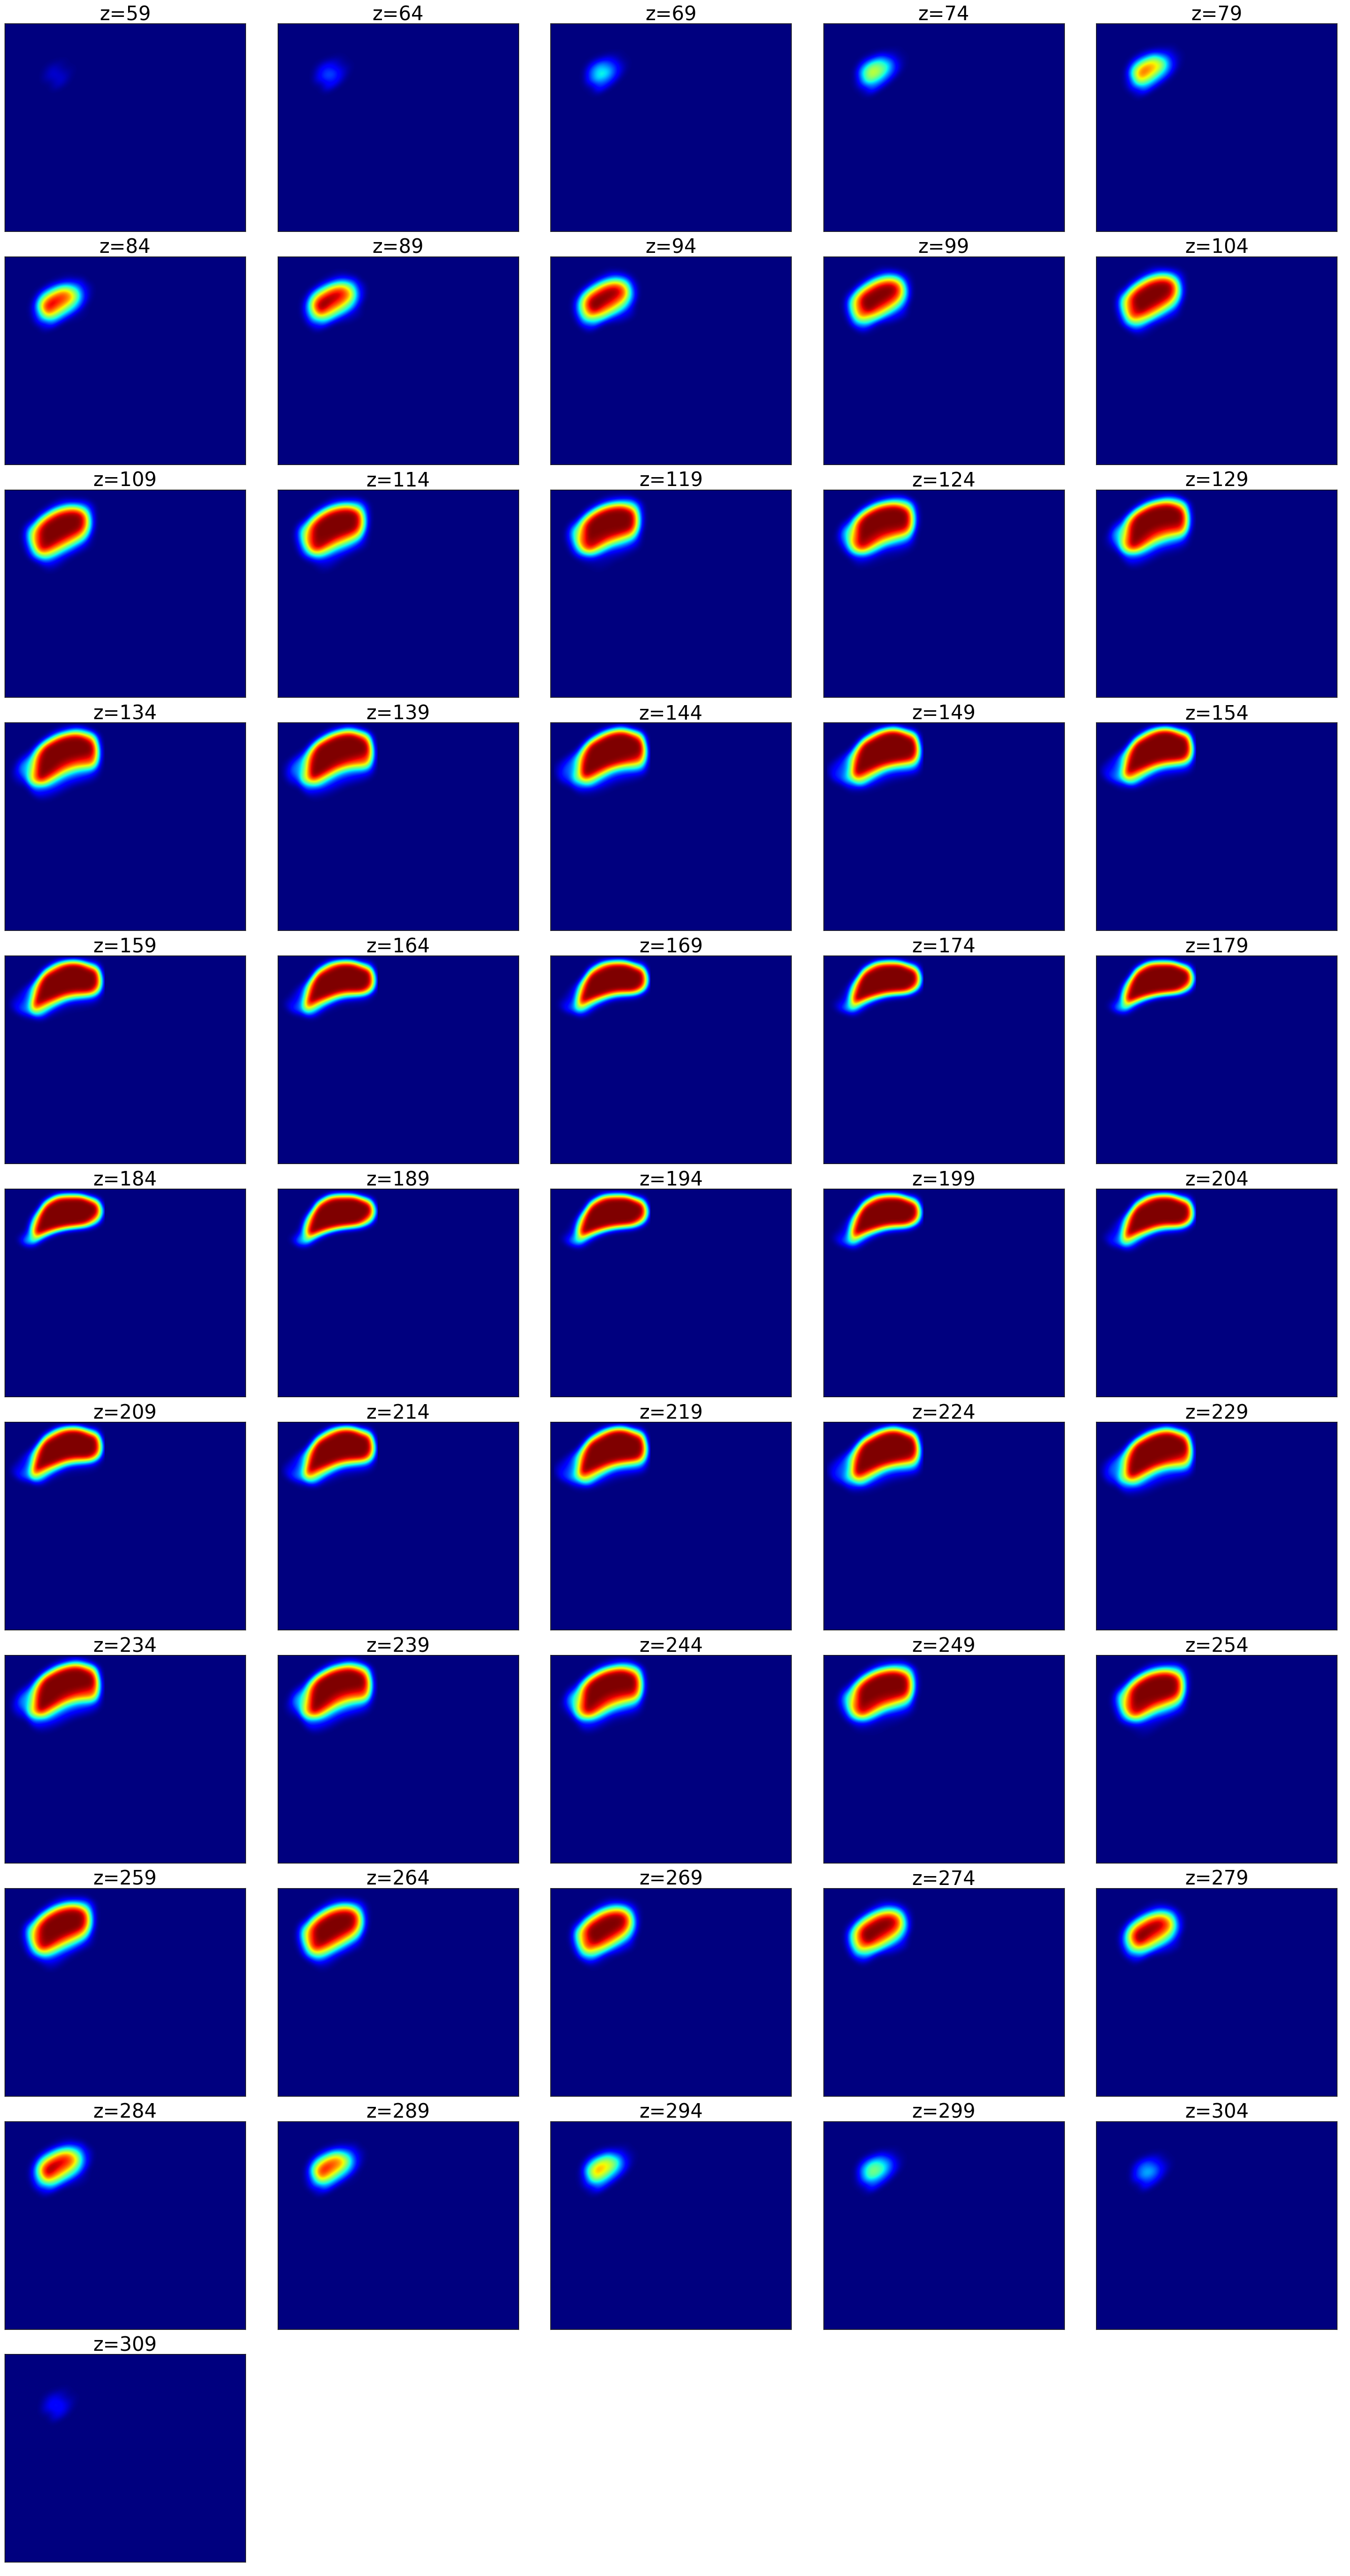

In [131]:
display_volume_sections(atlas_prob_volume_allLandmarks['SC'], every=5, vmin=0, vmax=1)

In [49]:
# Save full-brain atlas volumes.

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, structure=name_s)
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(vol, vol_fp)
    upload_to_s3(vol_fp)
    
    # Save atlas score volume bbox txt.
    fp = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, structure=name_s)
    np.savetxt(fp, np.array([prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax])[None,:], fmt='%d')
    upload_to_s3(fp)
    # This is wrt MD589 annotation volume

aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R.bp


Child returned 0
2.30 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R_bbox.txt


Child returned 0
0.72 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L.bp


Child returned 0
2.68 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L.bp


Child returned 0
1.91 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L_bbox.txt


Child returned 0
0.58 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R.bp


Child returned 0
1.66 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L.bp


Child returned 0
1.35 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L.bp


Child returned 0
1.97 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R.bp


Child returned 0
1.37 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R_bbox.txt


Child returned 0
0.76 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R.bp


Child returned 0
3.01 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L.bp


Child returned 0
1.62 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R.bp


Child returned 0
1.31 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg.bp


Child returned 0
2.58 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R.bp


Child returned 0
2.58 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R.bp


Child returned 0
2.03 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L.bp


Child returned 0
2.26 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L_bbox.txt


Child returned 0
0.66 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R.bp


Child returned 0
2.07 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R_bbox.txt


Child returned 0
1.61 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L.bp


Child returned 0
10.18 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N.bp


Child returned 0
1.82 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R.bp


Child returned 0
2.27 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L.bp


Child returned 0
2.06 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R.bp


Child returned 0
1.82 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R_bbox.txt


Child returned 0
0.77 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L.bp


Child returned 0
1.81 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L_bbox.txt


Child returned 0
0.58 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L.bp


Child returned 0
1.31 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R.bp


Child returned 0
1.26 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L.bp


Child returned 0
2.22 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R.bp


Child returned 0
1.59 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L.bp


Child returned 0
1.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L.bp


Child returned 0
1.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L_bbox.txt


Child returned 0
0.59 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R.bp


Child returned 0
1.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP.bp


Child returned 0
1.36 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L.bp


Child returned 0
1.60 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R.bp


Child returned 0
2.10 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R.bp


Child returned 0
1.31 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R_bbox.txt


Child returned 0
0.55 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L.bp


Child returned 0
1.27 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L_bbox.txt


Child returned 0
0.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC.bp


Child returned 0
7.89 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R.bp


Child returned 0
1.77 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R_bbox.txt


Child returned 0
0.55 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L.bp


Child returned 0
1.81 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R.bp


Child returned 0
1.26 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R.bp


Child returned 0
1.61 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R.bp


Child returned 0
1.57 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R.bp


Child returned 0
1.41 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R.bp


Child returned 0
1.66 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R.bp


Child returned 0
1.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L.bp


Child returned 0
1.40 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R.bp


Child returned 0
1.67 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L.bp


Child returned 0
1.62 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L.bp


Child returned 0
1.26 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L.bp


Child returned 0
1.55 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L.bp


Child returned 0
1.40 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC.bp


Child returned 0
10.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L.bp


Child returned 0
1.63 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L_bbox.txt


Child returned 0
0.67 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L.bp


Child returned 0
1.26 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L_bbox.txt


Child returned 0
0.51 seconds.


# Consider Surround

In [51]:
# Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

valid_level = .5

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
print "surround size (in voxels):", surround_distance_voxel

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    
    surround_vol = get_surround_volume(vol, valid_level=valid_level, distance=surround_distance_voxel, prob=True)
    
    vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, 
                                             structure=convert_to_surround_name(name_s, margin=surround_distance_um))
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(surround_vol, vol_fp)
    upload_to_s3(vol_fp)
    
    # Save surround score volume bbox txt.
    # This is wrt MD589 annotation volume
    fn = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, 
                                              structure=convert_to_surround_name(name_s, margin=surround_distance_um))
    np.savetxt(fn, np.array([prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax])[None,:], fmt='%d')
    upload_to_s3(fn)

surround size (in voxels): 13.5869565217
aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R_surround_200.bp


Child returned 0
1.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_R_surround_200_bbox.txt


Child returned 0
0.55 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L_surround_200.bp


Child returned 0
1.98 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_L_surround_200_bbox.txt


Child returned 0
0.58 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L_surround_200.bp


Child returned 0
1.88 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_L_surround_200_bbox.txt


Child returned 0
1.93 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R_surround_200.bp


Child returned 0
1.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_R_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L_surround_200.bp


Child returned 0
1.32 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_L_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L_surround_200.bp


Child returned 0
1.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_L_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R_surround_200.bp


Child returned 0
1.35 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_R_surround_200_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R_surround_200.bp


Child returned 0
1.61 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VLL_R_surround_200_bbox.txt


Child returned 0
0.80 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L_surround_200.bp


Child returned 0
1.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7N_L_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R_surround_200.bp


Child returned 0
1.33 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_PBG_R_surround_200_bbox.txt


Child returned 0
0.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg_surround_200.bp


Child returned 0
1.78 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RtTg_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R_surround_200.bp


Child returned 0
1.96 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5C_R_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R_surround_200.bp


Child returned 0
1.66 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Pn_R_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L_surround_200.bp


Child returned 0
1.54 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LRt_L_surround_200_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R_surround_200.bp


Child returned 0
1.97 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_R_surround_200_bbox.txt


Child returned 0
0.73 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L_surround_200.bp


Child returned 0
1.91 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_L_surround_200_bbox.txt


Child returned 0
0.65 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N_surround_200.bp


Child returned 0
1.72 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_12N_surround_200_bbox.txt


Child returned 0
0.61 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R_surround_200.bp


Child returned 0
1.76 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNR_R_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L_surround_200.bp


Child returned 0
1.77 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5O_L_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R_surround_200.bp


Child returned 0
1.60 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_R_surround_200_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L_surround_200.bp


Child returned 0
1.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_L_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L_surround_200.bp


Child returned 0
1.32 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_L_surround_200_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R_surround_200.bp


Child returned 0
1.25 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_R_surround_200_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L_surround_200.bp


Child returned 0
1.63 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_L_surround_200_bbox.txt


Child returned 0
0.83 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R_surround_200.bp


Child returned 0
1.68 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_R_surround_200_bbox.txt


Child returned 0
0.78 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L_surround_200.bp


Child returned 0
1.54 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_L_surround_200_bbox.txt


Child returned 0
0.61 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L_surround_200.bp


Child returned 0
1.41 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_L_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R_surround_200.bp


Child returned 0
1.42 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SNC_R_surround_200_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP_surround_200.bp


Child returned 0
1.31 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_AP_surround_200_bbox.txt


Child returned 0
1.81 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L_surround_200.bp


Child returned 0
2.58 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_RMC_L_surround_200_bbox.txt


Child returned 0
0.55 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R_surround_200.bp


Child returned 0
1.61 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Sp5I_R_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R_surround_200.bp


Child returned 0
1.27 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_3N_R_surround_200_bbox.txt


Child returned 0
0.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L_surround_200.bp


Child returned 0
1.30 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_6N_L_surround_200_bbox.txt


Child returned 0
0.78 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC_surround_200.bp


Child returned 0
3.16 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_IC_surround_200_bbox.txt


Child returned 0
0.57 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R_surround_200.bp


Child returned 0
1.73 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCA_R_surround_200_bbox.txt


Child returned 0
0.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L_surround_200.bp


Child returned 0
1.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_DC_L_surround_200_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R_surround_200.bp


Child returned 0
1.27 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_R_surround_200_bbox.txt


Child returned 0
0.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R_surround_200.bp


Child returned 0
1.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_R_surround_200_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R_surround_200.bp


Child returned 0
1.44 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_R_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R_surround_200.bp


Child returned 0
1.38 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_R_surround_200_bbox.txt


Child returned 0
0.53 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R_surround_200.bp


Child returned 0
1.47 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_R_surround_200_bbox.txt


Child returned 0
0.51 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R_surround_200.bp


Child returned 0
1.40 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_5N_R_surround_200_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L_surround_200.bp


Child returned 0
1.37 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_L_surround_200_bbox.txt


Child returned 0
0.55 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R_surround_200.bp


Child returned 0
1.37 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Tz_R_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L_surround_200.bp


Child returned 0
1.47 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_7n_L_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L_surround_200.bp


Child returned 0
1.31 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_4N_L_surround_200_bbox.txt


Child returned 0
0.50 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L_surround_200.bp


Child returned 0
1.41 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_LC_L_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L_surround_200.bp


Child returned 0
2.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_10N_L_surround_200_bbox.txt


Child returned 0
0.52 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC_surround_200.bp


Child returned 0
4.07 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_SC_surround_200_bbox.txt


Child returned 0
0.56 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L_surround_200.bp


Child returned 0
5.10 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_VCP_L_surround_200_bbox.txt


Child returned 0
2.02 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L_surround_200.bp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L_surround_200.bp


Child returned 0
8.64 seconds.


aws s3 cp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L_surround_200_bbox.txt s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_Amb_L_surround_200_bbox.txt


Child returned 0
2.16 seconds.


In [52]:
# Convert surround volumes to meshes

for name_s in all_known_structures_sided:
# for name_s in ['IC']:
    
    try:
        
        surr_name = convert_to_surround_name(name_s, margin=surround_distance_um)

        surround_vol = DataManager.load_original_volume(stack=atlas_name, structure=surr_name, downscale=32)
        
        if name_s in singular_structures:
            surround_vol = symmetricalize_volume(surround_vol)
        
        xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(surround_vol > 0)

        polydata = volume_to_polydata(surround_vol[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1], 
                                      origin=(xmin+prob_vol_xmin+ann_vol_xmin-canonical_centroid[0], 
                                           ymin+prob_vol_ymin+ann_vol_ymin-canonical_centroid[1], 
                                           zmin+prob_vol_zmin+ann_vol_zmin-canonical_centroid[2]), 
                           num_simplify_iter=3, smooth=True)
        
        # centered at "canonical centroid" - same as interior volumes
        
        mesh_fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=surr_name)
        save_mesh(polydata, mesh_fp)
        upload_to_s3(mesh_fp)
    
    except Exception as e:
        sys.stderr.write('Error generating mesh for %s : %s\n' % (surr_name, str(e)))        

marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23188: 0.19 seconds
simplify 1 @ 4640: 0.19 seconds
simplify 2 @ 931: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_L_surround_200.stl


Child returned 0
9.89 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23168: 0.20 seconds
simplify 1 @ 4636: 0.19 seconds
simplify 2 @ 930: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_5N_R_surround_200.stl


Child returned 0
6.03 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6417: 0.05 seconds
simplify 1 @ 1286: 0.04 seconds
simplify 2 @ 260: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_L_surround_200.stl


Child returned 0
3.62 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6402: 0.05 seconds
simplify 1 @ 1283: 0.04 seconds
simplify 2 @ 259: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_6N_R_surround_200.stl


Child returned 0
3.82 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34130: 0.31 seconds
simplify 1 @ 6829: 0.37 seconds
simplify 2 @ 1369: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_L_surround_200.stl


Child returned 0
2.95 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34176: 0.29 seconds
simplify 1 @ 6838: 0.29 seconds
simplify 2 @ 1370: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7N_R_surround_200.stl


Child returned 0
12.65 seconds.
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35190: 0.25 seconds
simplify 1 @ 7041: 0.30 seconds
simplify 2 @ 1411: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_L_surround_200.stl


Child returned 0
8.98 seconds.
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35250: 0.25 seconds
simplify 1 @ 7053: 0.30 seconds
simplify 2 @ 1413: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_7n_R_surround_200.stl


Child returned 0
6.92 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7229: 0.06 seconds
simplify 1 @ 1449: 0.05 seconds
simplify 2 @ 293: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_L_surround_200.stl


Child returned 0
3.66 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7247: 0.06 seconds
simplify 1 @ 1452: 0.05 seconds
simplify 2 @ 293: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Amb_R_surround_200.stl


Child returned 0
4.12 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16116: 0.15 seconds
simplify 1 @ 3226: 0.13 seconds
simplify 2 @ 648: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_L_surround_200.stl


Child returned 0
5.44 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16129: 0.17 seconds
simplify 1 @ 3229: 0.14 seconds
simplify 2 @ 649: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LC_R_surround_200.stl


Child returned 0
5.73 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31951: 0.25 seconds
simplify 1 @ 6393: 0.27 seconds
simplify 2 @ 1281: 0.05 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_L_surround_200.stl


Child returned 0
10.04 seconds.
marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31989: 0.27 seconds
simplify 1 @ 6401: 0.28 seconds
simplify 2 @ 1283: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_LRt_R_surround_200.stl


Child returned 0
8.05 seconds.
marching cube: 0.09 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 45485: 0.40 seconds
simplify 1 @ 9100: 0.41 seconds
simplify 2 @ 1823: 0.08 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_L_surround_200.stl


Child returned 0
12.84 seconds.
marching cube: 0.10 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 45418: 0.42 seconds
simplify 1 @ 9086: 0.43 seconds
simplify 2 @ 1820: 0.08 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Pn_R_surround_200.stl


Child returned 0
8.95 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19242: 0.16 seconds
simplify 1 @ 3852: 0.14 seconds
simplify 2 @ 773: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_L_surround_200.stl


Child returned 0
6.19 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19227: 0.16 seconds
simplify 1 @ 3848: 0.15 seconds
simplify 2 @ 772: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Tz_R_surround_200.stl


Child returned 0
5.62 seconds.
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 39238: 0.31 seconds
simplify 1 @ 7850: 0.35 seconds
simplify 2 @ 1573: 0.07 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_L_surround_200.stl


Child returned 0
13.82 seconds.
marching cube: 0.13 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39220: 0.34 seconds
simplify 1 @ 7847: 0.37 seconds
simplify 2 @ 1572: 0.07 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VLL_R_surround_200.stl


Child returned 0
8.34 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20512: 0.16 seconds
simplify 1 @ 4105: 0.17 seconds
simplify 2 @ 824: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_L_surround_200.stl


Child returned 0
4.82 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20485: 0.16 seconds
simplify 1 @ 4100: 0.16 seconds
simplify 2 @ 823: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RMC_R_surround_200.stl


Child returned 0
9.16 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24112: 0.17 seconds
simplify 1 @ 4825: 0.20 seconds
simplify 2 @ 968: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_L_surround_200.stl


Child returned 0
6.97 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24076: 0.18 seconds
simplify 1 @ 4818: 0.20 seconds
simplify 2 @ 966: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNC_R_surround_200.stl


Child returned 0
7.28 seconds.
marching cube: 0.17 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 71254: 0.56 seconds
simplify 1 @ 14254: 0.68 seconds
simplify 2 @ 2854: 0.14 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_L_surround_200.stl


Child returned 0
10.56 seconds.
marching cube: 0.18 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 71103: 0.60 seconds
simplify 1 @ 14223: 0.69 seconds
simplify 2 @ 2847: 0.14 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SNR_R_surround_200.stl


Child returned 0
13.97 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11921: 0.10 seconds
simplify 1 @ 2387: 0.09 seconds
simplify 2 @ 480: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_L_surround_200.stl


Child returned 0
4.42 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11947: 0.10 seconds
simplify 1 @ 2392: 0.09 seconds
simplify 2 @ 481: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_3N_R_surround_200.stl


Child returned 0
3.04 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5126: 0.04 seconds
simplify 1 @ 1028: 0.03 seconds
simplify 2 @ 208: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_L_surround_200.stl


Child returned 0
1.01 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5143: 0.04 seconds
simplify 1 @ 1031: 0.03 seconds
simplify 2 @ 209: 0.01 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_4N_R_surround_200.stl


Child returned 0
0.62 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28545: 0.30 seconds
simplify 1 @ 5712: 0.24 seconds
simplify 2 @ 1145: 0.05 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_L_surround_200.stl


Child returned 0
1.11 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28569: 0.31 seconds
simplify 1 @ 5717: 0.26 seconds
simplify 2 @ 1146: 0.05 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5I_R_surround_200.stl


Child returned 0
1.13 seconds.
marching cube: 0.09 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35153: 0.42 seconds
simplify 1 @ 7033: 0.27 seconds
simplify 2 @ 1409: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_L_surround_200.stl


Child returned 0
1.20 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35113: 0.43 seconds
simplify 1 @ 7025: 0.31 seconds
simplify 2 @ 1408: 0.07 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5O_R_surround_200.stl


Child returned 0
1.22 seconds.
marching cube: 0.18 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 70083: 0.64 seconds
simplify 1 @ 14019: 0.71 seconds
simplify 2 @ 2807: 0.13 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_L_surround_200.stl


Child returned 0
1.98 seconds.
marching cube: 0.17 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 69921: 0.61 seconds
simplify 1 @ 13987: 0.67 seconds
simplify 2 @ 2800: 0.13 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_Sp5C_R_surround_200.stl


Child returned 0
1.91 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11087: 0.08 seconds
simplify 1 @ 2220: 0.08 seconds
simplify 2 @ 447: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_L_surround_200.stl


Child returned 0
0.80 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11088: 0.08 seconds
simplify 1 @ 2220: 0.07 seconds
simplify 2 @ 447: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_PBG_R_surround_200.stl


Child returned 0
0.77 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16002: 0.13 seconds
simplify 1 @ 3203: 0.12 seconds
simplify 2 @ 643: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_L_surround_200.stl


Child returned 0
0.83 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15989: 0.13 seconds
simplify 1 @ 3201: 0.14 seconds
simplify 2 @ 643: 0.03 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_10N_R_surround_200.stl


Child returned 0
3.18 seconds.
marching cube: 0.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33457: 0.31 seconds
simplify 1 @ 6694: 0.29 seconds
simplify 2 @ 1342: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_L_surround_200.stl


Child returned 0
2.32 seconds.
marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33469: 0.32 seconds
simplify 1 @ 6697: 0.31 seconds
simplify 2 @ 1342: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCA_R_surround_200.stl


Child returned 0
2.28 seconds.
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 22948: 0.18 seconds
simplify 1 @ 4592: 0.18 seconds
simplify 2 @ 921: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_L_surround_200.stl


Child returned 0
1.01 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 22939: 0.20 seconds
simplify 1 @ 4591: 0.20 seconds
simplify 2 @ 921: 0.04 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_VCP_R_surround_200.stl


Child returned 0
1.03 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35057: 0.29 seconds
simplify 1 @ 7014: 0.34 seconds
simplify 2 @ 1406: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_L_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_L_surround_200.stl


Child returned 0
1.28 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34955: 0.28 seconds
simplify 1 @ 6994: 0.27 seconds
simplify 2 @ 1402: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_R_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_DC_R_surround_200.stl


Child returned 0
1.20 seconds.
marching cube: 0.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12855: 0.11 seconds
simplify 1 @ 2574: 0.10 seconds
simplify 2 @ 518: 0.02 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_AP_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_AP_surround_200.stl


Child returned 0
0.83 seconds.
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 36427: 0.33 seconds
simplify 1 @ 7288: 0.32 seconds
simplify 2 @ 1460: 0.06 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_12N_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_12N_surround_200.stl


Child returned 0
1.38 seconds.
marching cube: 0.19 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 62141: 0.76 seconds
simplify 1 @ 12431: 0.68 seconds
simplify 2 @ 2489: 0.14 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RtTg_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_RtTg_surround_200.stl


Child returned 0
1.91 seconds.
Child returned 0


rm -rf /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp && mkdir -p /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp


Child returned 1
0.67 seconds.
File does not exist: /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp
Error generating mesh for sp5_surround_200 : [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp'
Child returned 0


rm -rf /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp && mkdir -p /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp


Child returned 1
0.80 seconds.
File does not exist: /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp
Error generating mesh for outerContour_surround_200 : [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp'
marching cube: 0.85 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 222517: 2.51 seconds
simplify 1 @ 44506: 2.57 seconds
simplify 2 @ 8904: 0.53 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SC_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_SC_surround_200.stl


Child returned 0
5.07 seconds.
marching cube: 0.38 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 162219: 1.63 seconds
simplify 1 @ 32447: 1.77 seconds
simplify 2 @ 6492: 0.38 seconds


aws s3 cp /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_IC_surround_200.stl s3://mousebrainatlas-data/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_IC_surround_200.stl


Child returned 0
3.80 seconds.


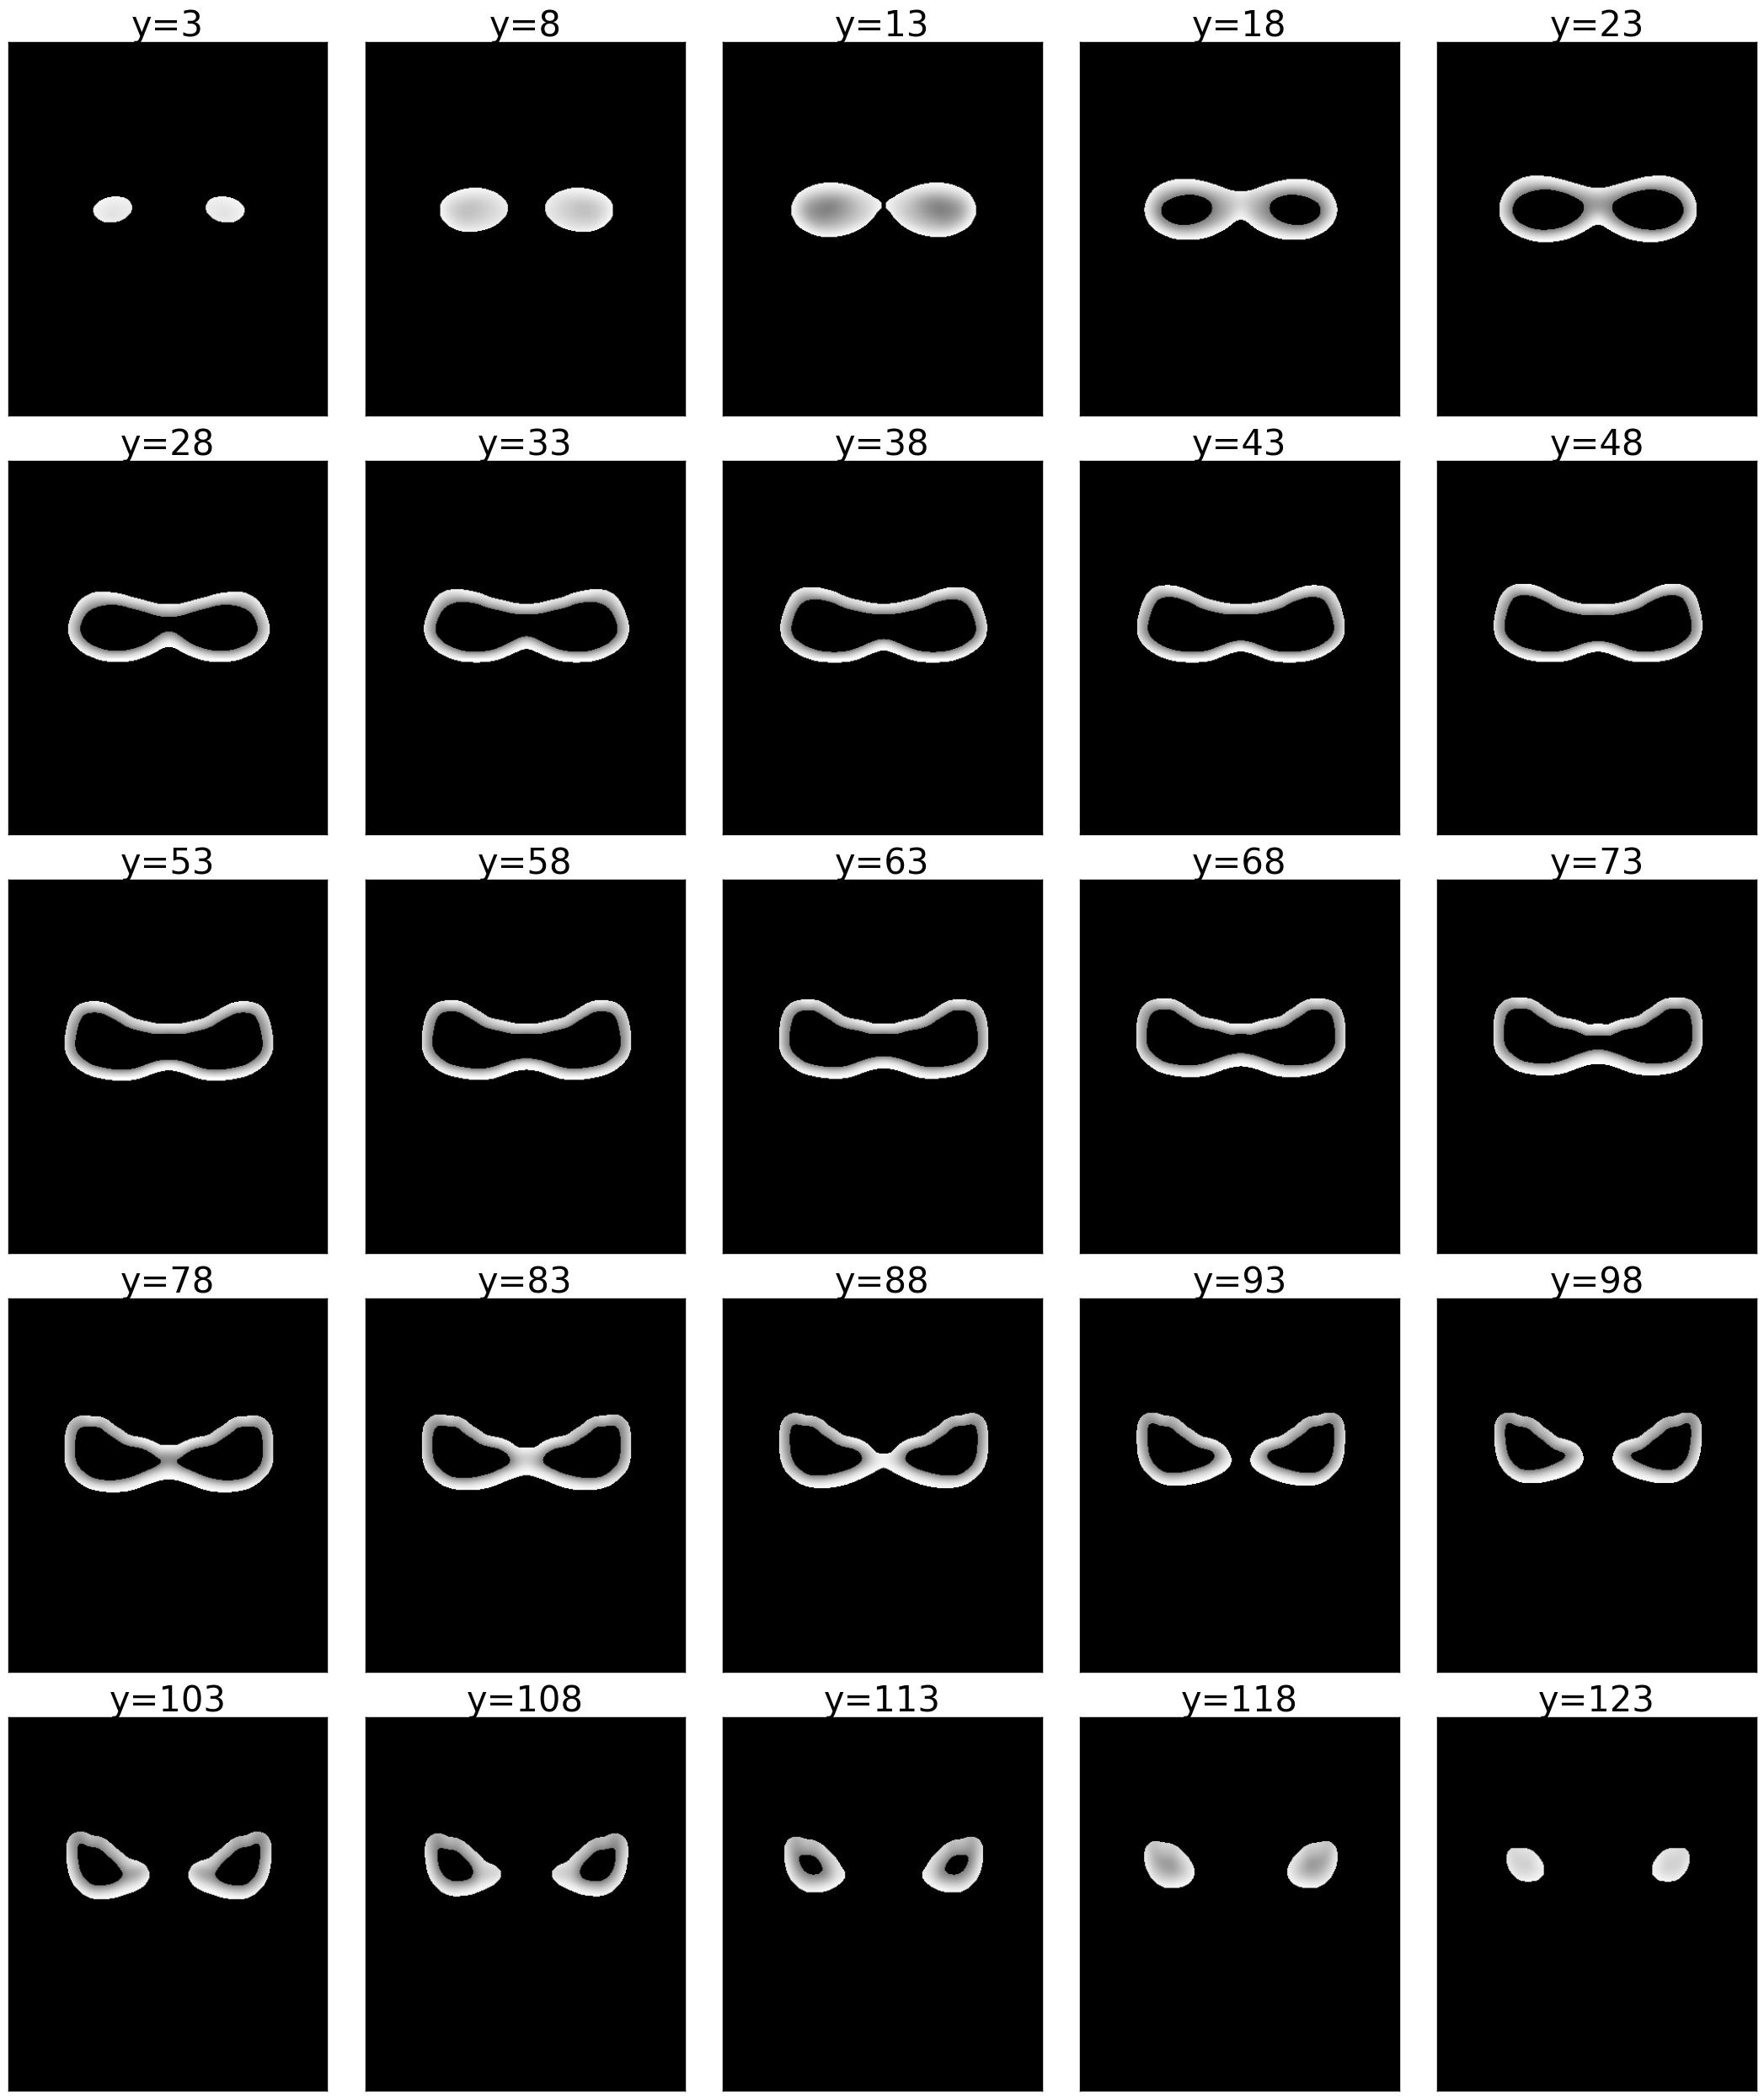

In [125]:
surround_vol = get_surround_volume(atlas_prob_volume_allLandmarks['IC'], distance=13, valid_level=0.5, prob=True)
display_volume_sections(surround_vol, direction='y', vmin=0, vmax=1., cmap=plt.cm.gray)

# Load and display meshes

In [126]:
# Load canonical info

canonical_locations = read_dict_from_txt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'), 
                                         key_converter=str)
canonical_centroid = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'))
canonical_normal = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'))

In [ ]:
# Load atlas meshes

atlas_space_structure_meshes = DataManager.load_meshes(stack_m=atlas_name, sided=True, include_surround=False)

In [46]:
# Load atlas meshes, including surrounding

atlas_space_structure_meshes_surround_included = DataManager.load_meshes(stack_m=atlas_name, sided=True, include_surround=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_outerContour.stl
Mesh is empty: outerContour.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_outerContour_surround_200.stl
Mesh is empty: outerContour_surround_200.
Error loading mesh for outerContour_surround_200.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5.stl
Mesh is empty: sp5.
Error loading mesh for sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV4/atlasV4_down32_scoreVolume/atlasV4_down32_scoreVolume_sp5_surround_200.stl
Mesh is empty: sp5_surround_200.
Error loading mesh for sp5_surround_200.


In [27]:
# Load shell
shell_polydata = DataManager.load_shell_mesh(stack=stack_fixed, downscale=32)

In [28]:
structure_sided_to_color = {n: np.random.randint(0, 255, (3,)) for n in all_known_structures_sided}
structure_to_color = {n: np.random.randint(0, 255, (3,)) for n in all_known_structures}

# Load probabilistic structure volumes

In [61]:
structure_volumes = DataManager.load_prob_shapes(stack_m=atlas_name, trial_idx=None, sided=True)

[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/probabilistic_shapes/atlasV4_down32_scoreVolume_sp5.bp'
Error loading probablistic shape for sp5.
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/probabilistic_shapes/atlasV4_down32_scoreVolume_outerContour.bp'
Error loading probablistic shape for outerContour.


In [88]:
# Interactively visualize a structure as prob. volume.

prob_vol, origin = structure_volumes['IC']

prob_vol_thresh = prob_vol >= .5
prob_vol_thresholded_polydata = volume_to_polydata(prob_vol_thresh, origin, num_simplify_iter=3, smooth=True)
launch_vtk([actor_mesh(prob_vol_thresholded_polydata, color=(1,1,1), wireframe=False)], init_angle='coronal')

marching cube: 1.03 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 64738: 0.90 seconds
simplify 1 @ 12949: 0.81 seconds
simplify 2 @ 2591: 0.15 seconds


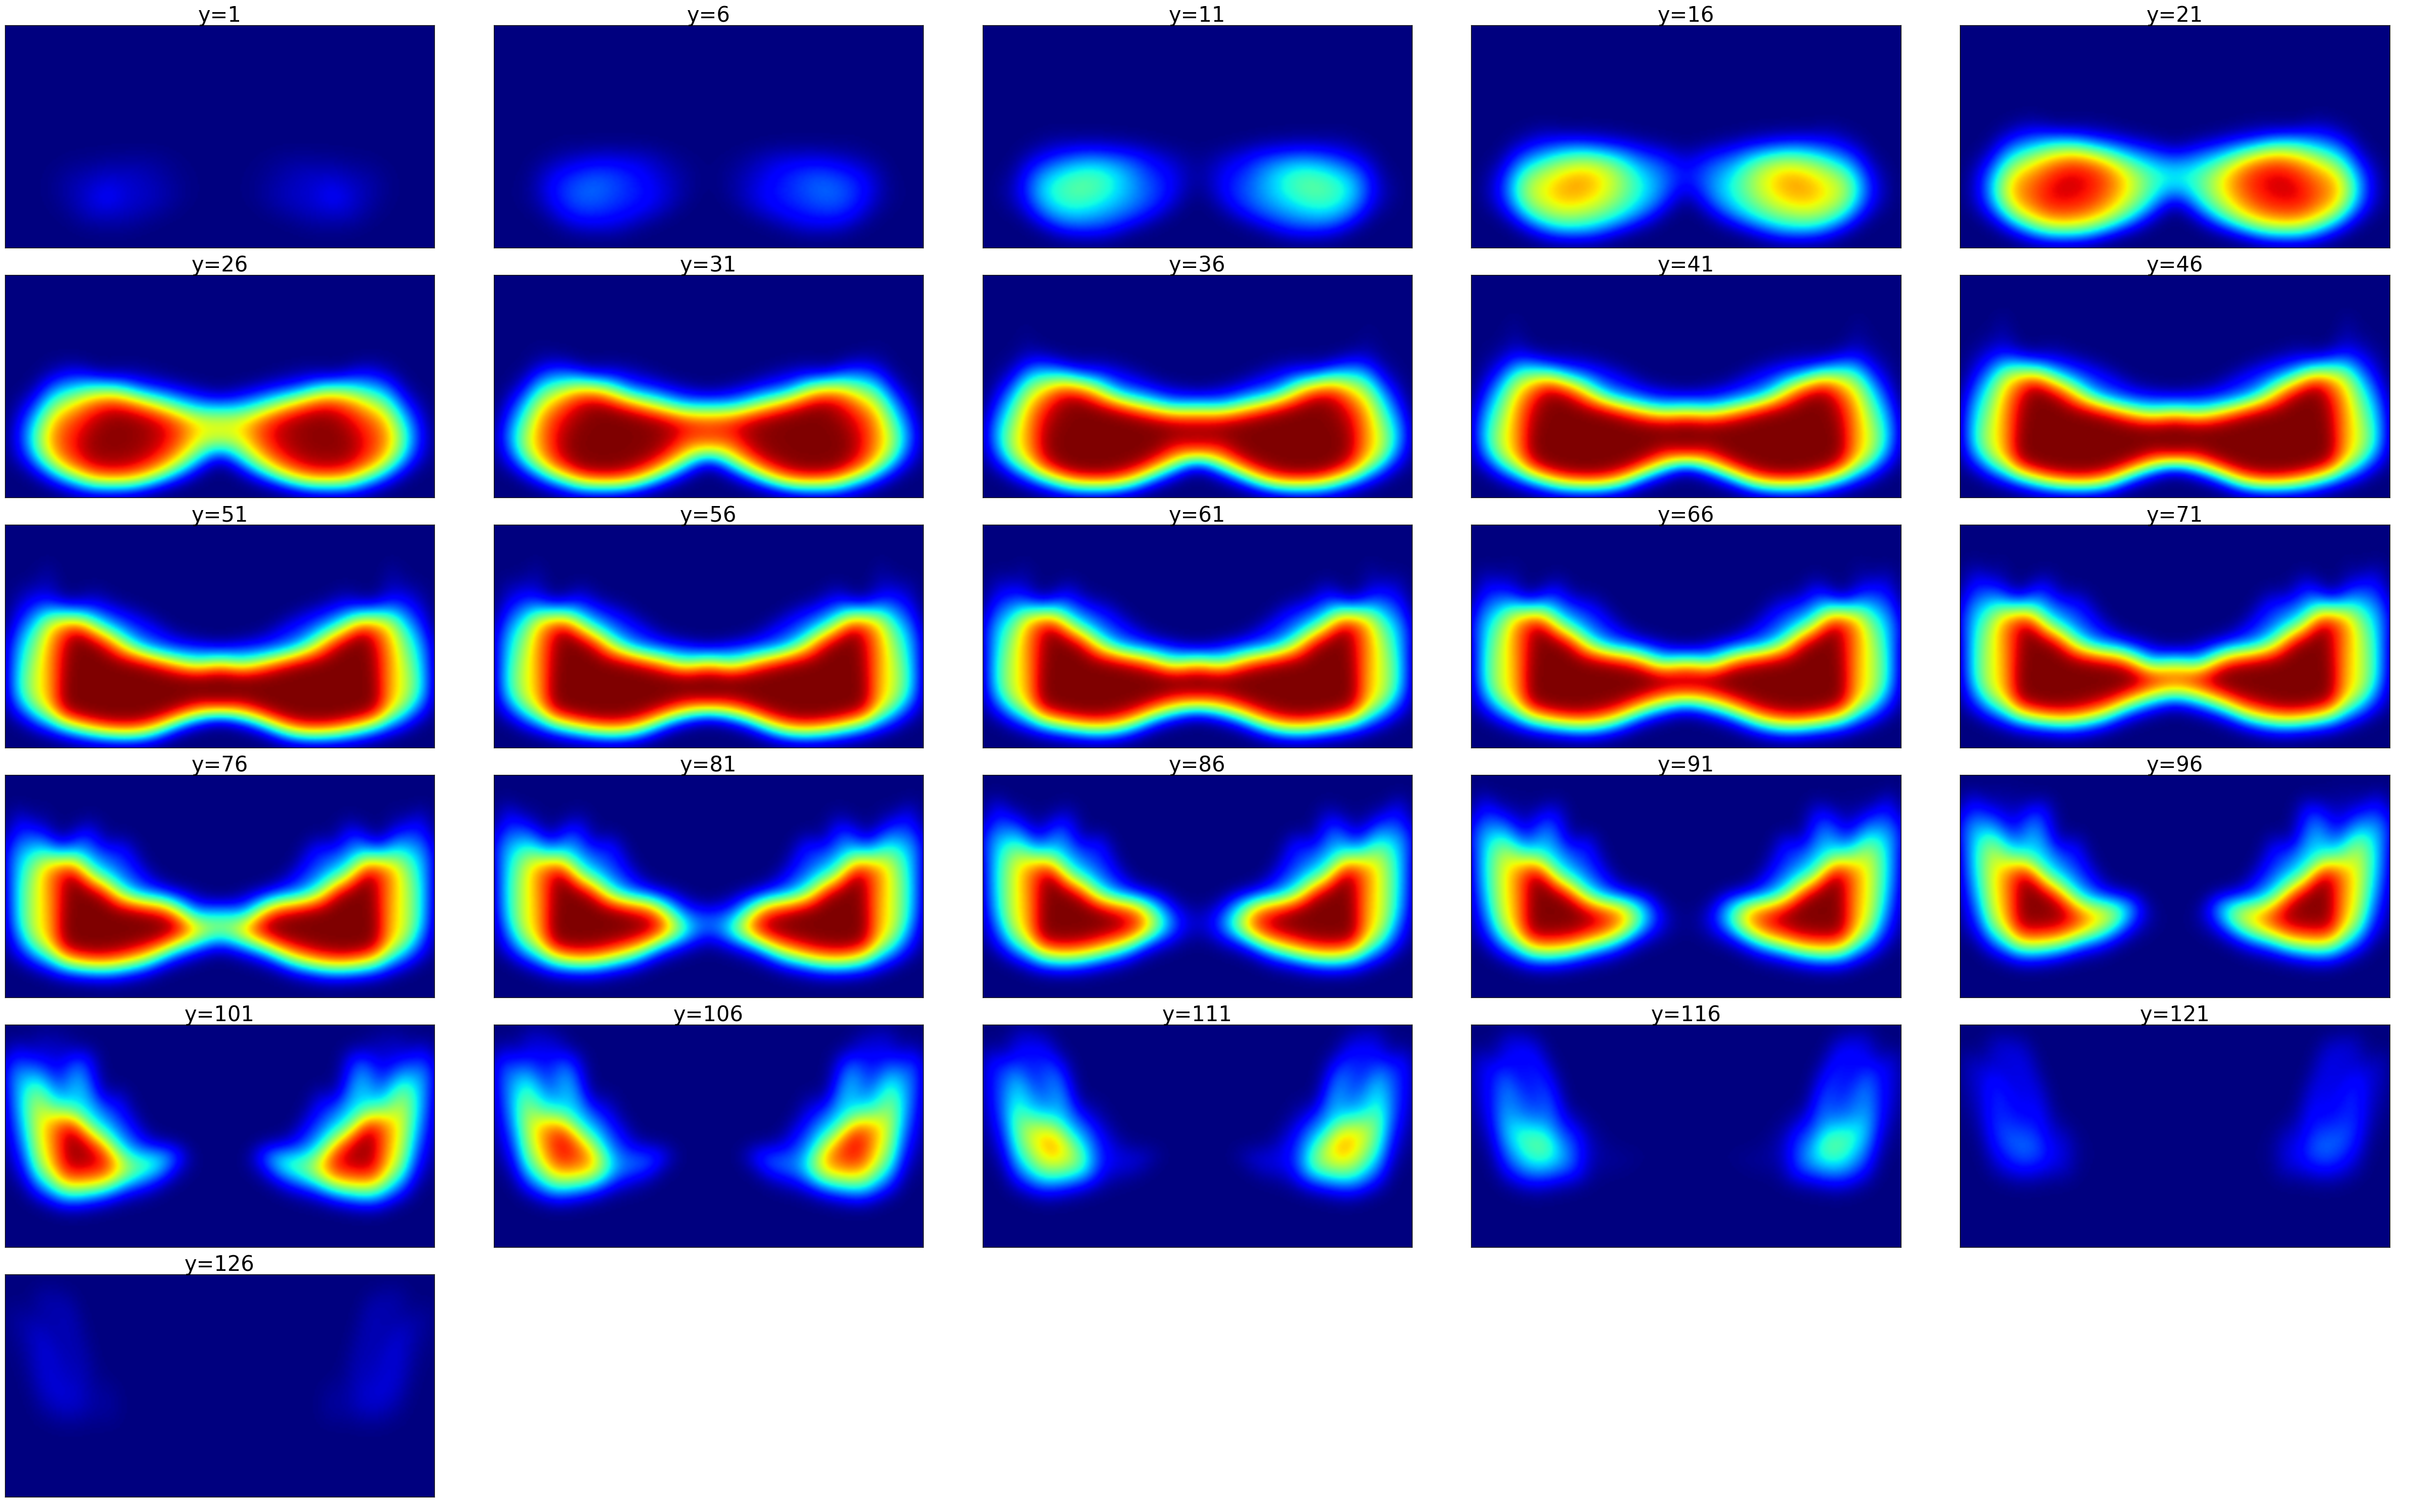

In [270]:
# for level in np.arange(.5, 1, .1):
#     display_volume_sections(prob_vol >= level, every=5, vmin=0, vmax=1, cmap=plt.cm.gray, direction='y')

display_volume_sections(structure_volumes['IC'][0], every=5, vmin=0, vmax=1, direction='y')

# Load whole atlas-space volumes

In [127]:
atlas_name = 'atlasV4'
atlas_space_structure_volumes, structure_to_label, label_to_structure = DataManager.load_original_volume_all_known_structures(stack=atlas_name, sided=True)

File does not exist: /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_annotationVolume/atlasV4_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.


rm -rf /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp && mkdir -p /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp


Child returned 0
Child returned 1
1.15 seconds.
File does not exist: /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp
Score volume for outerContour does not exist.
Child returned 0


rm -rf /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp && mkdir -p /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp


Child returned 1
0.84 seconds.
File does not exist: /home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp
Score volume for sp5 does not exist.
Volume shape: (373, 432, 369)


In [128]:
atlas_space_structure_volumes[structure_to_label['SC']].shape

(373, 432, 369)

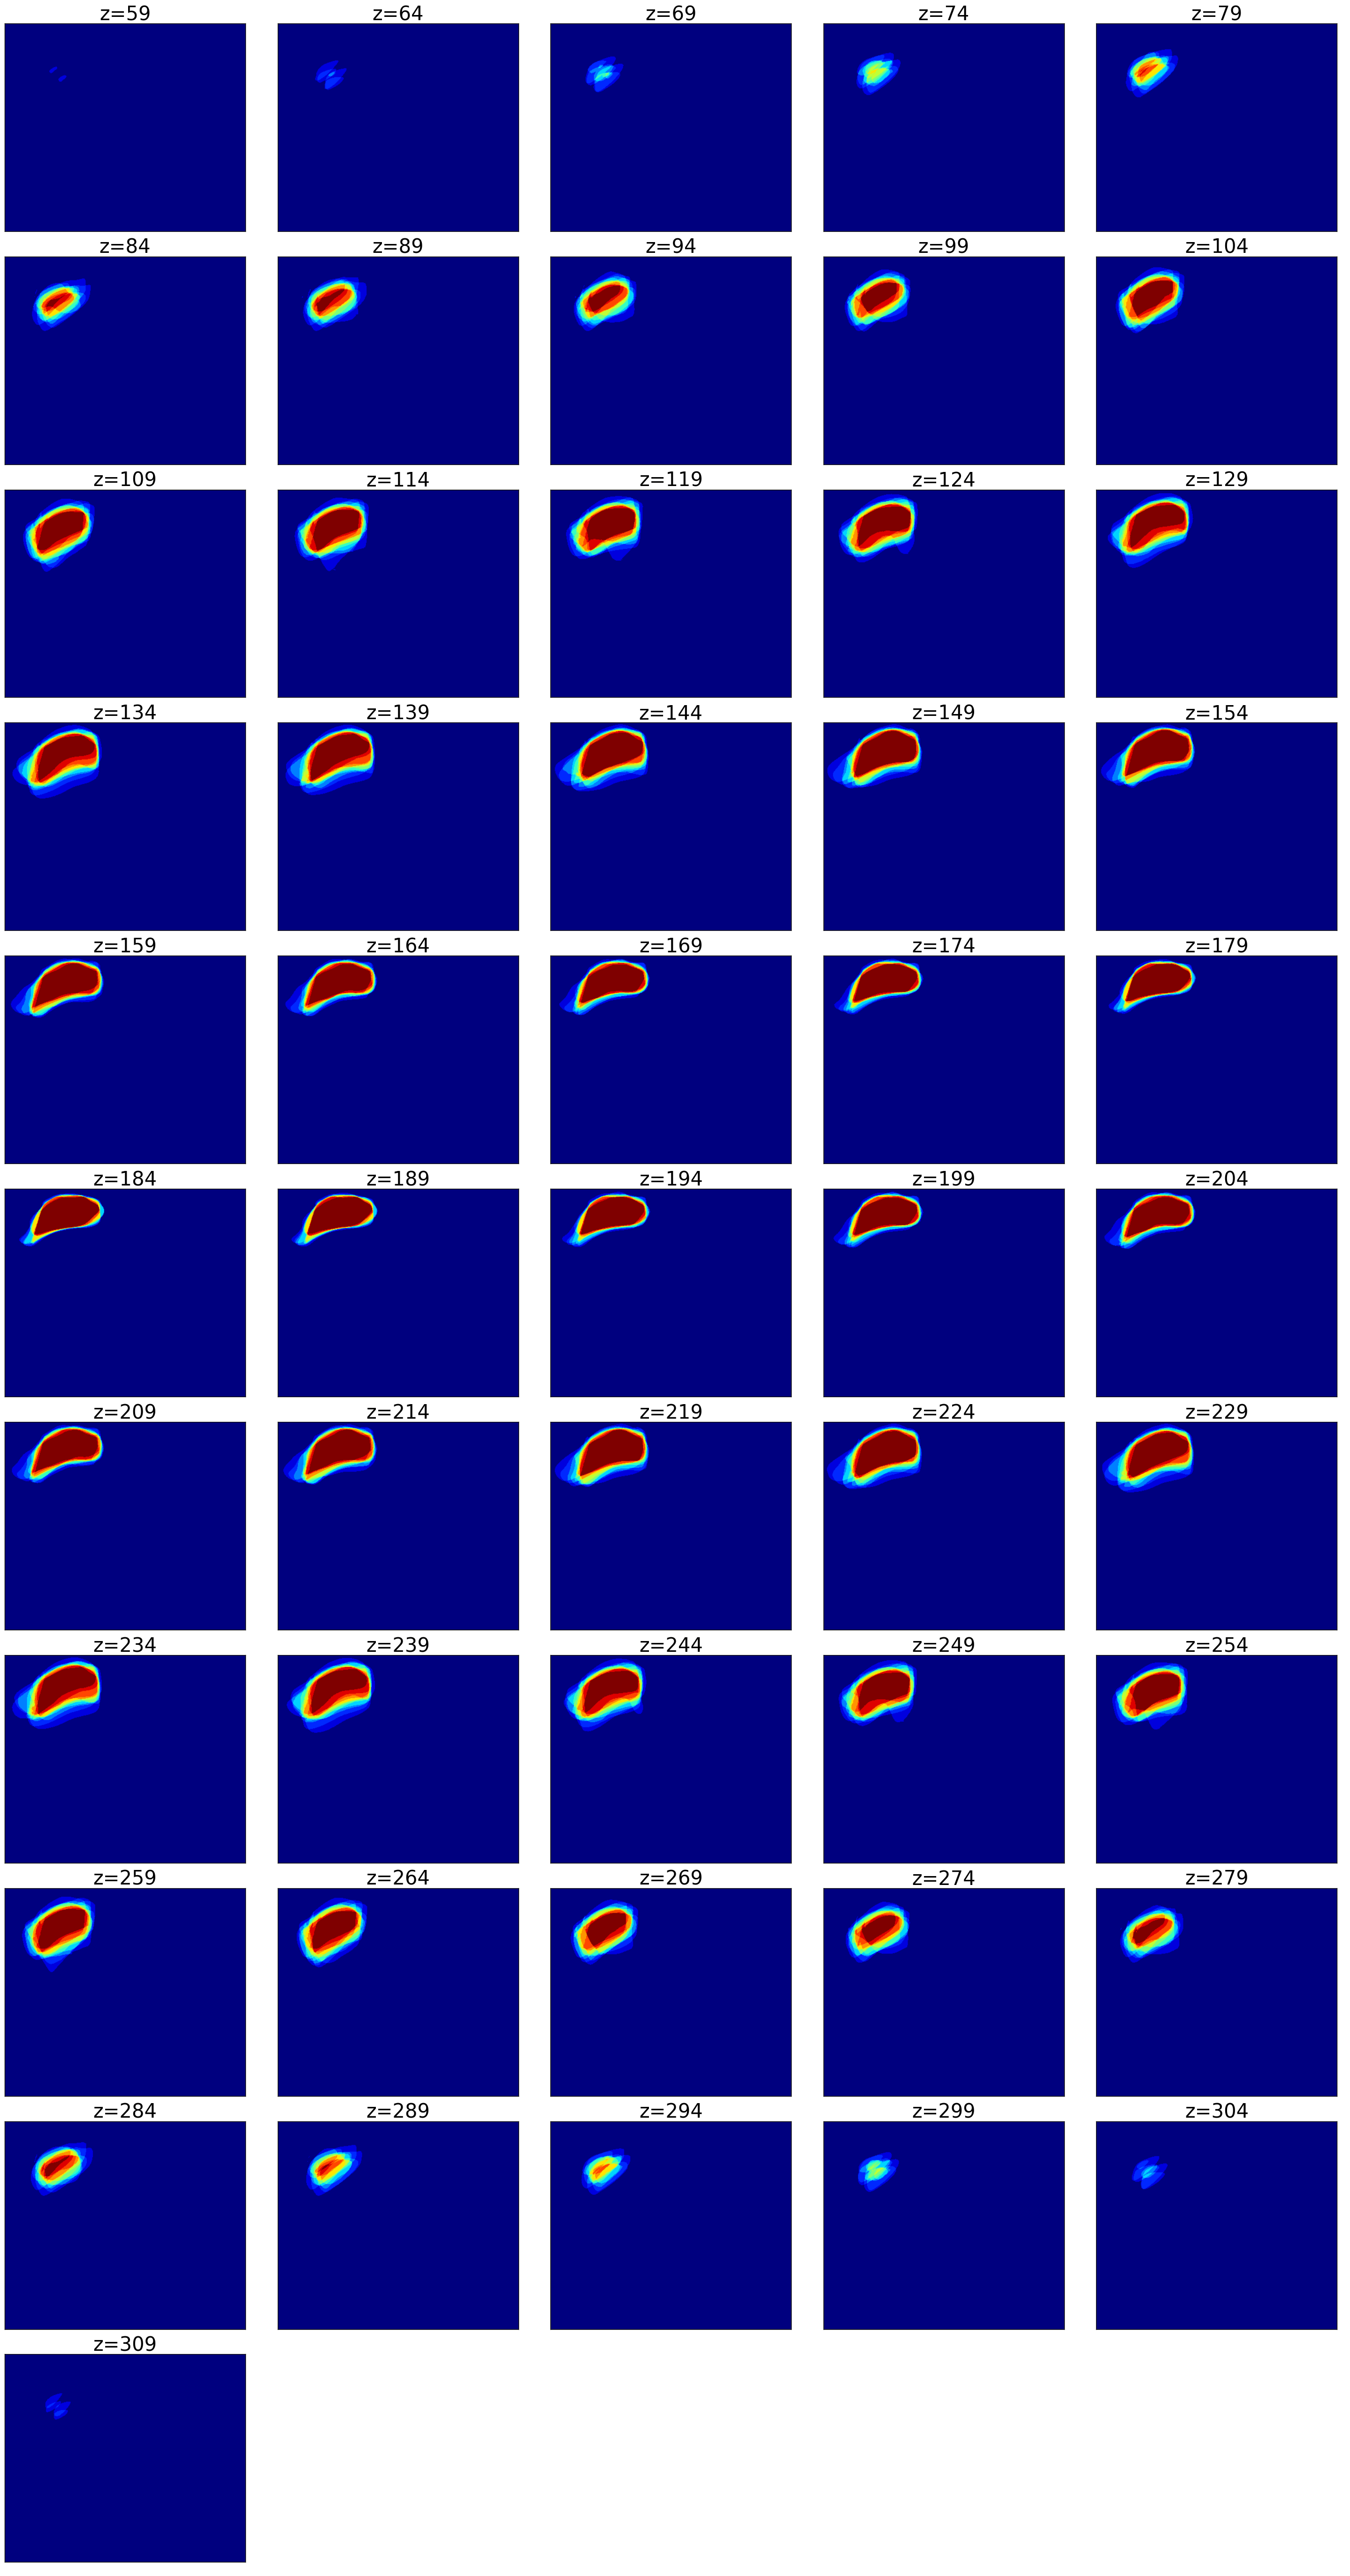

In [130]:
display_volume_sections(atlas_space_structure_volumes[structure_to_label['SC']], every=5, vmin=0, vmax=1)

# Compare atlasV4 and atlasV3

[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/probabilistic_shapes/atlasV4_down32_scoreVolume_sp5.bp'
Error loading probablistic shape for sp5.
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/probabilistic_shapes/atlasV4_down32_scoreVolume_outerContour.bp'
Error loading probablistic shape for outerContour.


78244


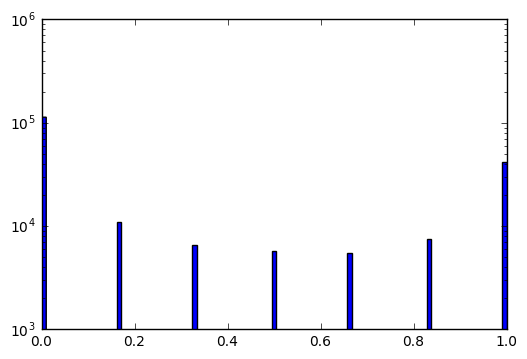

In [106]:
# atlasV4

structure_volumes = DataManager.load_prob_shapes(stack_m='atlasV4', trial_idx=None, sided=True)
print np.count_nonzero(structure_volumes['7N_R'][0])
plt.hist(structure_volumes['7N_R'][0].flatten(), bins=np.linspace(0.,1.,100), log=True);

[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/probabilistic_shapes/atlasV3_down32_scoreVolume_sp5.bp'
Error loading probablistic shape for sp5.
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/probabilistic_shapes/atlasV3_down32_scoreVolume_outerContour.bp'
Error loading probablistic shape for outerContour.


78850


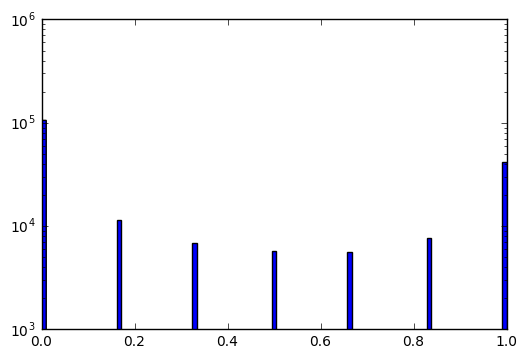

In [107]:
# atlasV3

structure_volumes = DataManager.load_prob_shapes(stack_m='atlasV3', trial_idx=None, sided=True)
print np.count_nonzero(structure_volumes['7N_R'][0])
plt.hist(structure_volumes['7N_R'][0].flatten(), bins=np.linspace(0.,1.,100), log=True);

# Create actors

In [ ]:
all_atlas_structure_mesh_actors = [actor_mesh(polydata, structure_to_color[convert_to_original_name(n)]/255.,
                                             wireframe=False) 
                                   for n, polydata in atlas_space_structure_meshes.iteritems()]

In [66]:
# all_atlas_structure_surround_mesh_actors = [actor_mesh(polydata, color=(1,1,1),
#                                                       wireframe=True) 
#                                             for n, polydata in atlas_space_structure_surround_meshes.iteritems()]

In [67]:
shell_actor = actor_mesh(shell_polydata, (1,1,1), opacity=.15, wireframe=False, origin=-canonical_centroid)

In [46]:
# Visualize all structures as prob. volumes.

all_atlas_structure_volume_actors = []
for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    name_u = convert_to_original_name(name_s)
    structure_volume_actor = actor_volume(volume.astype(np.float32), what='probability', origin=origin, c=structure_to_color[name_u])
    all_atlas_structure_volume_actors.append(structure_volume_actor)

# Show actors

In [229]:
launch_vtk([actor_mesh(atlas_space_structure_meshes_surround_included[n], color=(1,1,1), wireframe=True) 
           for n in ['SC', 'SC_surround_200']])

In [262]:
launch_vtk([actor_mesh(atlas_space_structure_meshes_surround_included['SC'], color=(1,1,1), wireframe=True, opacity=1.),
            actor_mesh(atlas_space_structure_meshes_surround_included['SC_surround_200'], color=(0,1,1), wireframe=True,
                      opacity=.2)])

In [227]:
launch_vtk([actor_mesh(atlas_space_structure_meshes['Sp5C_L'])])

In [68]:
launch_vtk(all_atlas_structure_mesh_actors, init_angle='coronal')

In [32]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_surround_mesh_actors)

In [181]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_volume_actors, init_angle='sagittal')

In [38]:
launch_vtk([actor_mesh(polydata, structure_colors[convert_name_to_unsided(n)]/255.) 
            for n, polydata in atlas_space_structure_meshes.iteritems()] + \
           [shell_actor], init_angle='30')

In [69]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='coronal')

In [33]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown')

In [31]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown', animate=False,
          interactive=False, snapshot_fn='/home/yuncong/snapshot_horizontal.png', snapshot_magnification=10)

In [30]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='sagittal', animate=False, 
           interactive=False, snapshot_fn='/home/yuncong/snapshot_sagittal.png', snapshot_magnification=10)

In [38]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal', animate=True)

In [74]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal')

In [39]:
launch_vtk(all_atlas_structure_volume_actors , init_angle='sagittal')